<p style="align: center;"><img align=center src="https://drive.google.com/uc?export=view&id=1I8kDikouqpH4hf7JBiSYAeNT2IO52T-T" width=600 height=480/></p>
<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Сегментация изображений</b></h3>


В этом задании вам предстоит решить задачу сегментации медицинских снимков. Часть кода с загрузкой данных написана за вас. Всю содержательную сторону вопроса вам нужно заполнить самостоятельно. Задание оценивается из 15 баллов. 

Обратите внимание, что отчёт по заданию стоит целых 6 баллов. Он вынесен в отдельный пункт в конце тетради. Это сделано для того, чтобы тетрадь была оформлена как законченный документ о проведении экспериментов. Неотъемлемой составляющей отчёта является ответ на следующие вопросы:

* Что было сделано? Что получилось реализовать, что не получилось?
* Какие результаты ожидалось получить?
* Какие результаты были достигнуты?
* Чем результаты различных подходов отличались друг от друга и от бейзлайна (если таковой присутствует)?




---


1. Для начала мы скачаем датасет: [ADDI project](https://www.fc.up.pt/addi/ph2%20database.html).

<table><tr><td>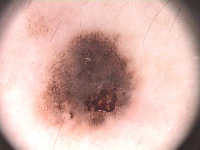</td><td>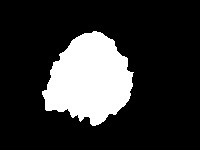</td></tr></table>

2. Разархивируем .rar файл.
3. Обратите внимание, что папка  `PH2 Dataset images` должна лежать там же где и ipynb notebook.

Это фотографии двух типов **поражений кожи:** меланома и родинки.
В данном задании мы не будем заниматься их классификацией, а будем **сегментировать** их.

In [ ]:
# !wget -c https://www.dropbox.com/s/8lqrloi0mxj2acu/PH2Dataset.rar
!wget -c https://www.dropbox.com/s/k88qukc20ljnbuo/PH2Dataset.rar

--2022-12-02 09:59:29--  https://www.dropbox.com/s/k88qukc20ljnbuo/PH2Dataset.rar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/k88qukc20ljnbuo/PH2Dataset.rar [following]
--2022-12-02 09:59:29--  https://www.dropbox.com/s/raw/k88qukc20ljnbuo/PH2Dataset.rar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0fc8f34b139fefa760d22d7417.dl.dropboxusercontent.com/cd/0/inline/Bx1MRZbbws8LQWuWfXtO2F8j-KF6TDnesOc50RhtKIMT9jt1uClLZM0hOc9DD5wsUgUgGq1aM0txsQxf5XUvVYSMSQ8PZLpJkpdRh80xoZS-CZx74CuyCONwM36WDLZ7GccZuPOlmGACJTgtFHJQBs-FNQNtY2XgOlHOpeesLELQmw/file# [following]
--2022-12-02 09:59:30--  https://uc0fc8f34b139fefa760d22d7417.dl.dropboxusercontent.com/cd/0/inline/Bx1MRZbbws8LQWuWfXtO2F8j-KF6TDnesOc50RhtKIMT9jt1uClLZM0hOc9DD5wsUgUgGq1

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive/')

In [ ]:
!ls

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [ ]:
get_ipython().system_raw("unrar x PH2Dataset.rar")

Стуктура датасета у нас следующая:

    IMD_002/
        IMD002_Dermoscopic_Image/
            IMD002.bmp
        IMD002_lesion/
            IMD002_lesion.bmp
        IMD002_roi/
            ...
    IMD_003/
        ...
        ...

 Здесь `X.bmp` — изображение, которое нужно сегментировать, `X_lesion.bmp` — результат сегментации.

Для загрузки датасета можно использовать skimage: [`skimage.io.imread()`](https://scikit-image.org/docs/dev/api/skimage.io.html)

In [ ]:
images = []
lesions = []
from skimage.io import imread
import os
root = 'PH2Dataset'

for root, dirs, files in os.walk(os.path.join(root, 'PH2 Dataset images')):
    if root.endswith('_Dermoscopic_Image'):
        images.append(imread(os.path.join(root, files[0])))
    if root.endswith('_lesion'):
        lesions.append(imread(os.path.join(root, files[0])))

Изображения имеют разные размеры. Давайте изменим их размер на $256\times256 $ пикселей. Для изменения размера изображений можно использовать [`skimage.transform.resize()`](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize).
Эта функция также автоматически нормализует изображения в диапазоне $[0,1]$.


In [ ]:
from skimage.transform import resize
size = (256, 256)
X = [resize(x, size, mode='constant', anti_aliasing=True,) for x in images]
Y = [resize(y, size, mode='constant', anti_aliasing=False) > 0.5 for y in lesions]

In [ ]:
import numpy as np
X = np.array(X, np.float32)
Y = np.array(Y, np.float32)
print(f'Loaded {len(X)} images')

Loaded 200 images


In [ ]:
len(lesions)

200

Чтобы убедиться, что все корректно, мы нарисуем несколько изображений

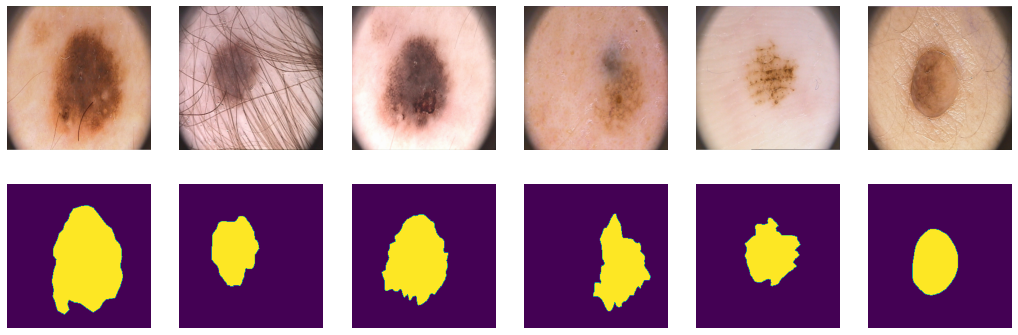

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

plt.figure(figsize=(18, 6))
for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.axis("off")
    plt.imshow(X[i])

    plt.subplot(2, 6, i+7)
    plt.axis("off")
    plt.imshow(Y[i])
plt.show();

Разделим наши 200 картинок на 100/50/50
 для обучения, валидации и теста соответственно

In [ ]:
# перемешиваем случайным образом
ix = np.random.choice(len(X), len(X), False)
tr, val, ts = np.split(ix, [100, 150])

In [ ]:
print(len(tr), len(val), len(ts))

100 50 50


#### PyTorch DataLoader

In [ ]:
from torch.utils.data import DataLoader
batch_size = 25
data_tr = DataLoader(list(zip(np.rollaxis(X[tr], 3, 1), Y[tr, np.newaxis])), 
                     batch_size=batch_size, shuffle=True)
data_val = DataLoader(list(zip(np.rollaxis(X[val], 3, 1), Y[val, np.newaxis])),
                      batch_size=batch_size, shuffle=True)
data_ts = DataLoader(list(zip(np.rollaxis(X[ts], 3, 1), Y[ts, np.newaxis])),
                     batch_size=batch_size, shuffle=True)

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# Реализация различных архитектур:
Ваше задание будет состоять в том, чтобы написать несколько нейросетевых архитектур для решения задачи семантической сегментации. Сравнить их по качеству на тесте и испробовать различные лосс функции для них.

-----------------------------------------------------------------------------------------

# SegNet [2 балла]

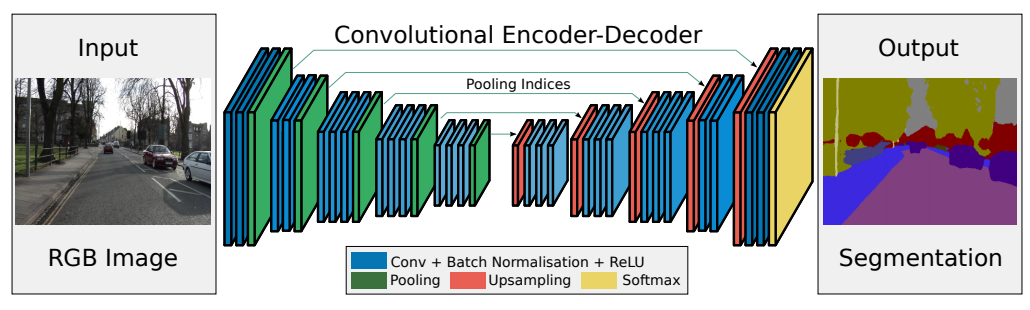

* Badrinarayanan, V., Kendall, A., & Cipolla, R. (2015). [SegNet: A deep convolutional
encoder-decoder architecture for image segmentation](https://arxiv.org/pdf/1511.00561.pdf)

Внимательно посмотрите из чего состоит модель и для чего выбраны те или иные блоки.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import torch.optim as optim
from time import time
import datetime
import gc
from torch.autograd import Variable

from matplotlib import rcParams
rcParams['figure.figsize'] = (15,4)

# Segnet

In [ ]:
RELU_INPLACE = False

In [ ]:
class SegNet(nn.Module):
    def __init__(self, input_channels=3, output_channels=1, init_features=32):
        super().__init__()

        self.input_channels = input_channels
        self.output_channels = output_channels
        self.nfeatures = init_features

        # encoder (downsampling)
        # Each enc_conv/dec_conv block should look like this:
        # nn.Sequential(
        #     nn.Conv2d(...),
        #     ... (2 or 3 conv layers with relu and batchnorm),
        # )


        self.enc_conv0 = nn.Sequential(
          # 1, conv+bn+relu
          nn.Conv2d(in_channels=self.input_channels, out_channels=64, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(inplace=RELU_INPLACE),

          # 2, conv+bn+relu
          nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(inplace=RELU_INPLACE),
        )

        # 3, pool                                
        self.pool0 = nn.MaxPool2d(2, stride=2, return_indices=True) # 256 -> 128
        
        self.enc_conv1 = nn.Sequential(
          # 4, conv+bn+relu
          nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(128),
          nn.ReLU(inplace=RELU_INPLACE),

          # 5, conv+bn+relu
          nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(128),
          nn.ReLU(inplace=RELU_INPLACE),
        )

        # 6, pool
        self.pool1 = nn.MaxPool2d(2, stride=2, return_indices=True) #128 -> 64

        self.enc_conv2 = nn.Sequential(
          # 7, conv+bn+relu
          nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(256),
          nn.ReLU(inplace=RELU_INPLACE),

          # 8, conv+bn+relu
          nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(256),
          nn.ReLU(inplace=RELU_INPLACE),

          # 9, conv+bn+relu
          nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(256),
          nn.ReLU(inplace=RELU_INPLACE),
        )

        # 10, pooling
        self.pool2 = nn.MaxPool2d(2, stride=2, return_indices=True) # 64 -> 32

        self.enc_conv3 = nn.Sequential(
          # 11, conv+bn+relu
          nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(inplace=RELU_INPLACE),

          # 12, conv+bn+relu
          nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(inplace=RELU_INPLACE),

          # 13, conv+bn+relu
          nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(inplace=RELU_INPLACE),
        )

        # 14, pool
        self.pool3 = nn.MaxPool2d(2, stride=2, return_indices=True) # 32 -> 16    

        # в одной последовательности bottleneck, невозможно реализовать передачи индексов
        # поэтому разделю ее на две

        self.bottleneck_enc_conv = nn.Sequential(
          # 15, conv+bn+relu
          nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(inplace=RELU_INPLACE),

          # 16, conv+bn+relu
          nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(inplace=RELU_INPLACE),

          # 17, conv+bn+relu
          nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(inplace=RELU_INPLACE),
        )

        # 18, pool
        self.bottleneck_pool = nn.MaxPool2d(2, stride=2, return_indices=True)
        
        # 19, upsample
        self.bottleneck_upsample = nn.MaxUnpool2d(2, 2)

        self.bottleneck_dec_conv = nn.Sequential(
          # 20, conv+bn+relu
          nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(inplace=RELU_INPLACE),

          # 21, conv+bn+relu
          nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(inplace=RELU_INPLACE),

          # 22, conv+bn+relu
          nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(inplace=RELU_INPLACE),
        )

        # decoder (upsampling)

        # 23, upsample
        self.upsample0 = nn.MaxUnpool2d(2, 2) # 16 -> 32

        self.dec_conv0 = nn.Sequential(
          # 24, conv+bn+relu
          nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(inplace=RELU_INPLACE),

          # 25, conv+bn+relu
          nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(inplace=RELU_INPLACE),

          # 26, conv+bn+relu
          nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(256),
          nn.ReLU(inplace=RELU_INPLACE),
        )

        # 27, upsample
        self.upsample1 = nn.MaxUnpool2d(2, 2)  # 32 -> 64

        self.dec_conv1 = nn.Sequential(
          # 28, conv+bn+relu
          nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(256),
          nn.ReLU(inplace=RELU_INPLACE),

          # 29, conv+bn+relu
          nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(256),
          nn.ReLU(inplace=RELU_INPLACE),

          # 30, conv+bn+relu
          nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(128),
          nn.ReLU(inplace=RELU_INPLACE),
        )

        # 31, upsample
        self.upsample2 = nn.MaxUnpool2d(2, 2)  # 64 -> 128

        self.dec_conv2 = nn.Sequential(
          # 32, conv+bn+relu
          nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(128),
          nn.ReLU(inplace=RELU_INPLACE),

          # 33, conv+bn+relu
          nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(inplace=RELU_INPLACE),
        )

        # 34, upsample
        self.upsample3 = nn.MaxUnpool2d(2, 2)  # 128 -> 256

        self.dec_conv3 = nn.Sequential(
          # 35, conv+bn+relu
          nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(inplace=RELU_INPLACE),

          # 36, conv+bn+relu
          nn.Conv2d(in_channels=64, out_channels=output_channels, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(output_channels),
          # nn.ReLU(inplace=RELU_INPLACE),

          # 37, активация - не нужна, возвращенм логиты
          # nn.Sigmoid()
        )

        # # 37, softmax

    def forward(self, x):
        # encoder
        e0, ind0 = self.pool0(self.enc_conv0(x)) #
        e1, ind1 = self.pool1(self.enc_conv1(e0)) # 
        e2, ind2 = self.pool2(self.enc_conv2(e1)) #
        e3, ind3 = self.pool3(self.enc_conv3(e2)) #  

        # bottleneck
        bn_enc, bn_ind = self.bottleneck_pool(self.bottleneck_enc_conv(e3))
        bn_dec = self.bottleneck_dec_conv(self.bottleneck_upsample(bn_enc, bn_ind))

        # decoder
        d0 = self.dec_conv0(self.upsample0(bn_dec, ind3))
        d1 = self.dec_conv1(self.upsample1(d0, ind2))
        d2 = self.dec_conv2(self.upsample2(d1, ind1))
        d3 = self.dec_conv3(self.upsample2(d2, ind0))
        
        return d3 # no activation



## Метрика

В данном разделе предлагается использовать следующую метрику для оценки качества:

$I o U=\frac{\text {target } \cap \text { prediction }}{\text {target } \cup{prediction }}$

Пересечение (A ∩ B) состоит из пикселей, найденных как в маске предсказания, так и в основной маске истины, тогда как объединение (A ∪ B) просто состоит из всех пикселей, найденных либо в маске предсказания, либо в целевой маске.


Для примера посмотрим на истину (слева) и предсказание (справа):
![alt text](https://www.jeremyjordan.me/content/images/2018/05/target_prediction.png)


Тогда пересечение и объединение будет выглядеть так:

![alt text](https://www.jeremyjordan.me/content/images/2018/05/intersection_union.png)

In [ ]:
def iou_pytorch(outputs: torch.Tensor, labels: torch.Tensor):
    # You can comment out this line if you are passing tensors of equal shape
    # But if you are passing output from UNet or something it will most probably
    # be with the BATCH x 1 x H x W shape
    outputs = outputs.squeeze(1).byte()  # BATCH x 1 x H x W => BATCH x H x W
    labels = labels.squeeze(1).byte()
    SMOOTH = 1e-8
    intersection = (outputs & labels).float().sum((1, 2))  # Will be zero if Truth=0 or Prediction=0
    union = (outputs | labels).float().sum((1, 2))         # Will be zzero if both are 0
    
    iou = (intersection + SMOOTH) / (union + SMOOTH)  # We smooth our devision to avoid 0/0
    
    #thresholded = torch.clamp(20 * (iou - 0.5), 0, 10).ceil() / 10  # This is equal to comparing with thresolds
    
    return iou  # 


## Функция потерь [1 балл]

Не менее важным, чем построение архитектуры, является определение **оптимизатора** и **функции потерь.**

Функция потерь - это то, что мы пытаемся минимизировать. Многие из них могут быть использованы для задачи бинарной семантической сегментации. 

Популярным методом для бинарной сегментации является *бинарная кросс-энтропия*, которая задается следующим образом:

$$\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

где $y$ это  таргет желаемого результата и $\hat y$ является выходом модели. $\sigma$ - это [*логистическая* функция](https://en.wikipedia.org/wiki/Sigmoid_function), который преобразует действительное число $\mathbb R$ в вероятность $[0,1]$.

Однако эта потеря страдает от проблем численной нестабильности. Самое главное, что $\lim_{x\rightarrow0}\log(x)=\infty$ приводит к неустойчивости в процессе оптимизации. Рекомендуется посмотреть следующее [упрощение](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits). Эта функция эквивалентна первой и не так подвержена численной неустойчивости:

$$\mathcal L_{BCE} = \hat y - y\hat y + \log\left(1+\exp(-\hat y)\right).$$

In [ ]:
def bce_loss(y_pred, y_real):
    y_pred, y_real = torch.unsqueeze(y_pred, 1), torch.unsqueeze(y_real, 1)
    sigmoid = nn.Sigmoid()
    y_pred = sigmoid(y_pred)
    #для y_real сигмоида не нужна, т.к. входные данные там и так только 0 и 1, что можно считать вероятностями 
    eps = 10 ** -20
    result = - (y_real * (y_pred + eps).log() + (1 - y_real) * (1 - y_pred + eps).log() ).mean()
    return result

## Тренировка [1 балл]

Мы определим цикл обучения в функции, чтобы мы могли повторно использовать его.

In [ ]:
def train(model, opt, sched, loss_fn, score_model_by_metric, epochs, data_tr, data_val, model_name='', load=False):
    
    torch.cuda.empty_cache()
    gc.collect()

    # загрузка модели
    PATH = './'
    EXTENSION = '.pth'
    if (model_name != '' and load == True):
        model = torch.load(PATH + model_name + '.pth')
        model.to(device)
    
    X_val, Y_val = next(iter(data_val))
    
    train_losses = []
    valid_losses = []
    metric_scores = []
    best_metric_score = 0
    
    for epoch in range(epochs):
        
        #train phase
        
        tic = time()
        print('* Epoch %d/%d' % (epoch+1, epochs))
        
        model.train()
        running_train_losses = []
        for X_batch, Y_batch in data_tr:

            # data to device
            X_batch = X_batch.to(device)
            Y_batch = Y_batch.to(device)

            # set parameter gradients to zero
            opt.zero_grad()
            
            # функции подсчета средних лоссов пришлось изменить,
            # потому что изначально они работали неправильно 
            with torch.set_grad_enabled(True):
                # forward
                Y_pred = model(X_batch)
                loss =  loss_fn(Y_pred, Y_batch) # forward-pass
                running_train_losses.append(loss.detach().item())
                loss.backward()   # backward-pass
                opt.step()  # update weights

            avg_train_loss = np.mean(running_train_losses)
            
        # train loss    
        epoch_train_loss = avg_train_loss
        train_losses.append(epoch_train_loss)
        toc = time()
        print('finished train phase;', end=' ')


        # show intermediate results
        
        # test phase
        model.eval() 
        running_val_losses = []
        for X_val, Y_val in data_val:
            with torch.no_grad():
                Y_hat = model(X_val.to(device)).detach().cpu() # detach and put into cpu
                loss = loss_fn(Y_hat, Y_val) # forward-pass
                # print('loss: ', loss)
                running_val_losses.append(loss.detach().item())
                
            avg_val_loss = np.mean(running_val_losses)
            # print('avg_val_loss:', avg_val_loss)
            
        # val loss    
        epoch_val_loss = avg_val_loss
        valid_losses.append(epoch_val_loss)
        toc = time()
        print('finished valid phase;', end=' ')
        
        # metric score
        epoch_metric_score = score_model_by_metric(model, iou_pytorch, data_tr)
        metric_scores.append(epoch_metric_score)    
        toc = time()
        print('finished metric score phase;', end=' ')
        
        if epoch_metric_score > best_metric_score:
            best_metric_score = epoch_metric_score

        if sched:
            sched.step(epoch_metric_score)

        # Visualize tools
        clear_output(wait=True)
        for k in range(6):
            plt.subplot(2, 6, k+1)
            plt.imshow(np.rollaxis(X_val[k].numpy(), 0, 3), cmap='gray')
            plt.title('Real')
            plt.axis('off')

            plt.subplot(2, 6, k+7)
            plt.imshow(Y_hat[k, 0], cmap='gray')
            plt.title('Output')
            plt.axis('off')
        first_suptitle = ('%d / %d - train loss: %f, valid loss: %f' % (epoch+1, epochs, epoch_train_loss, avg_val_loss))
        second_suptitle = ('metric score: %f / best metric score: %f' % (epoch_metric_score, best_metric_score))
        plt.suptitle(f'{first_suptitle}\n{second_suptitle}')
        
        plt.show()
    
    if model_name == '':
        model_name = f'{model=}'.split('=')[0]
    
    torch.save(model, PATH + 
           f'{model_name}_epochs-{epochs}_{datetime.datetime.now().isoformat(sep="_", timespec="seconds").replace(":", "-")}'
           + EXTENSION
          )
    
    
    return model, model_name, [train_losses, valid_losses, metric_scores]

## Инференс [1 балл]

После обучения модели эту функцию можно использовать для прогнозирования сегментации на новых данных:

In [ ]:
def predict(model, data):
    model.eval()  # testing mode
    Y_pred = [ X_batch for X_batch, _ in data]
    return np.array(Y_pred)

In [ ]:
def score_model(model, metric, data):
    model.eval()  # testing mode
    scores = 0
    for X_batch, Y_label in data:
        with torch.no_grad():
            threshold = 0.5
            Y_pred = model(X_batch.to(device))
            Y_pred = torch.sigmoid(Y_pred)
            # Выходы данные  не приведены к 0 и 1 - введем threshold, значения больше которого будет относить к 1, меньше к 0    
            Y_pred = torch.where(Y_pred > 0.5, 1, 0)
            scores += metric(Y_pred, Y_label.to(device)).mean().item()

    return scores/len(data)

## Основной момент: обучение

Обучите вашу модель. Обратите внимание, что обучать необходимо до сходимости. Если указанного количества эпох (20) не хватило, попробуйте изменять количество эпох до сходимости алгоритма. Сходимость определяйте по изменению функции потерь на валидационной выборке.
 С параметрами оптимизатора можно спокойно играть, пока вы не найдете лучший вариант для себя.


In [ ]:
!nvidia-smi

Fri Dec  2 06:34:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    34W /  70W |  13030MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# будем сохранять данные, чтобы можно было восстановить их в случае ошибки
import pickle

def save_file(file, file_name):
  with open(f'{file_name}.pkl', 'wb') as f:
    pickle.dump(file, f)
    f.close()

def load_file(file_name):
  with open(f'{file_name}.pkl', 'rb') as f:
    file = pickle.load(f)
    return file

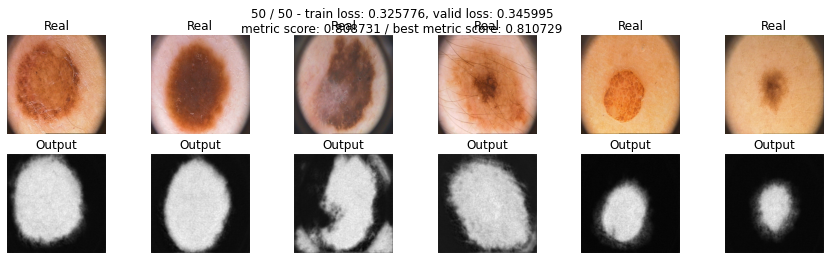

In [ ]:
# segnet_bce_model

# если уже модель существует, удалим ее, чтобы освободить память
if 'segnet_bce_model' in globals():
    del segnet_bce_model, optimizer, scheduler
    torch.cuda.empty_cache()
    gc.collect()


segnet_bce_model = SegNet()
segnet_bce_model = segnet_bce_model.to(device)
optimizer = torch.optim.AdamW(segnet_bce_model.parameters(), lr=0.001, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 50, 75, 100], gamma=0.75)
max_epochs = 50

segnet_bce_model, segnet_bce_model_name, segnet_bce_losses_history = train(segnet_bce_model, optimizer, scheduler, bce_loss, 
                                                    score_model, max_epochs, data_tr, data_val, model_name='segnet_bce_model')

In [ ]:
save_file(segnet_bce_losses_history, 'segnet_bce_losses_history')
segnet_bce_losses_history_loaded_from = load_file('segnet_bce_losses_history')
segnet_bce_losses_history == segnet_bce_losses_history_loaded_from

True

Ответьте себе на вопрос: не переобучается ли моя модель?

Для ответа на этот вопрос построим кривые обучения:

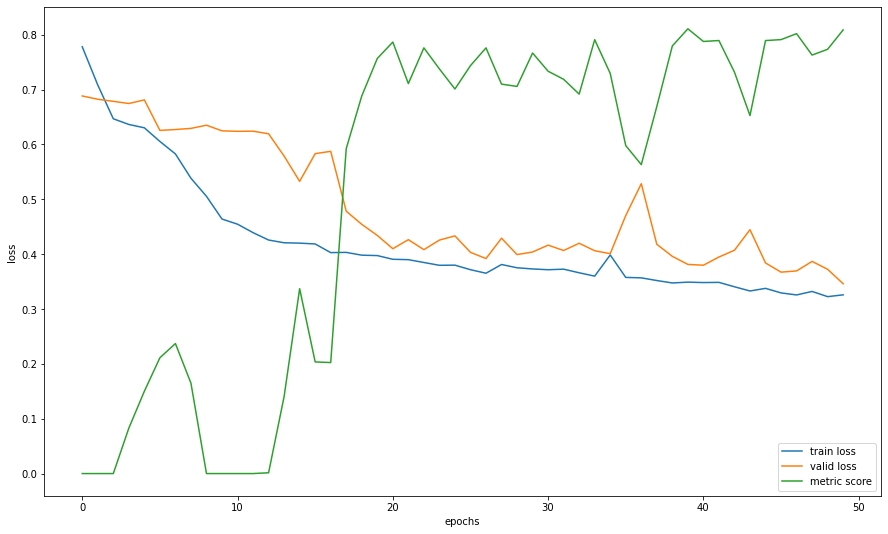

In [ ]:
plot_results(segnet_bce_losses_history)

Как мы видим, кривые train loss и valid loss сошлись друг к другу и идут примерно в одном диапазоне, в котором оба лосса падают. Переобучение - это когда эти кривые после определенной точки разошлись и train loss был бы сильно меньше valid loss. Однако можно заметить, что на ~35 эпохе произошел резкий скачет лосса и далее чуть увеличился диапазон расхождения \
**Вывод: модель не еще переобучилась, но на последних итерацияй видно начало тентенции расхождения диапозона трейна и валидации, что, скорее всего, говорит о начале переобучения**

-----------------------------------------------------------------------------------------

## Дополнительные функции потерь [2 балла] 

 В данном разделе вам потребуется имплементировать две функции потерь:
 DICE и Focal loss. 
 Если у вас что-то не учится, велика вероятность, что вы ошиблись или учите слишком мало эпох, прежде чем бить тревогу попробуйте перебрать различные варианты и убедитесь, что во всех других сетапах сеть достигает желанного результата. СПОЙЛЕР: учиться она будет при всех лоссах, предложенных в этом задании.


**1. Dice coefficient:** Учитывая две маски $X$ и $Y$, общая метрика для измерения расстояния между этими двумя масками задается следующим образом:

$$D(X,Y)=\frac{2|X\cap Y|}{|X|+|Y|}$$

Эта функция не является дифференцируемой, но это необходимое свойство для градиентного спуска. В данном случае мы можем приблизить его с помощью:

$$\mathcal L_D(X,Y) = 1-\frac{1}{256 \times 256} \times \frac{\sum_i2X_iY_i}{\sum_iX_i+Y_i}.$$

Не забудьте подумать о численной нестабильности, возникающей в математической формуле.


In [ ]:
def dice_loss(y_pred, y_real):
    smooth = 1e-8
    sigmoid = nn.Sigmoid()
    y_pred = sigmoid(y_pred)    
    
    inputs = y_pred.view(-1)
    targets = y_real.view(-1)

    intersection = (inputs * targets).sum() 
    card = (inputs + targets).sum()
    
    dice = ( (2.0 * intersection) + smooth ) / ( card + smooth)  
    
    return 1.0 - dice

Проводим тестирование:

In [ ]:
# удлаить предыдущую модель
del segnet_bce_model, optimizer, scheduler
torch.cuda.empty_cache()
gc.collect()

22031

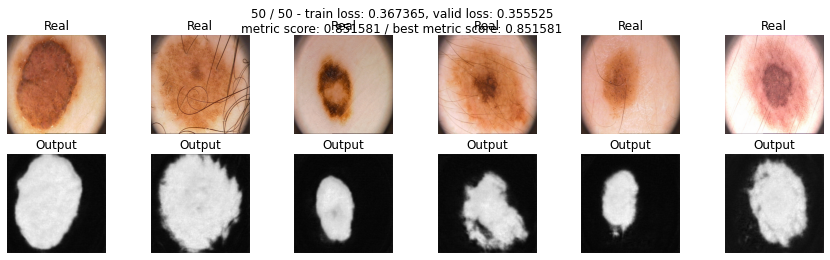

In [ ]:
# segnet_dice_model

# если уже модель существует, удалим ее, чтобы освободить память
if 'segnet_dice_model' in globals():
    del segnet_dice_model, optimizer, scheduler
    torch.cuda.empty_cache()
    gc.collect()

segnet_dice_model = SegNet()
segnet_dice_model = segnet_dice_model.to(device)
optimizer = torch.optim.AdamW(segnet_dice_model.parameters(), lr=0.001, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 50, 75, 100], gamma=0.75)
max_epochs = 50

segnet_dice_model, segnet_dice_model_name, segnet_dice_losses_history = train(segnet_dice_model, optimizer, scheduler,
                                                                              dice_loss, score_model, max_epochs,
                                                                              data_tr, data_val, model_name='segnet_dice_model')

In [ ]:
save_file(segnet_dice_losses_history, 'segnet_dice_losses_history')
segnet_dice_losses_history_loaded_from = load_file('segnet_dice_losses_history')
segnet_dice_losses_history == segnet_dice_losses_history_loaded_from

True

[**2. Focal loss:**](https://arxiv.org/pdf/1708.02002.pdf) 

Окей, мы уже с вами умеем делать BCE loss:

$$\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Проблема с этой потерей заключается в том, что она имеет тенденцию приносить пользу классу **большинства** (фоновому) по отношению к классу **меньшинства** ( переднему). Поэтому обычно применяются весовые коэффициенты к каждому классу:

$$\mathcal L_{wBCE}(y, \hat y) = -\sum_i \alpha_i\left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Традиционно вес $\alpha_i$ определяется как обратная частота класса этого пикселя $i$, так что наблюдения миноритарного класса весят больше по отношению к классу большинства.

Еще одним недавним дополнением является взвешенный пиксельный вариант, которая взвешивает каждый пиксель по степени уверенности, которую мы имеем в предсказании этого пикселя.

$$\mathcal L_{focal}(y, \hat y) = -\sum_i \left[\left(1-\sigma(\hat y_i)\right)^\gamma y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Зафиксируем значение $\gamma=2$.

--------------------------------------------------------------------------------


In [ ]:
def focal_loss(y_pred, y_real, eps = 1e-8, gamma = 2):
    sigmoid = nn.Sigmoid()
    
    y_real = y_real.view(-1)
    y_pred = y_pred.view(-1)
    y_pred = sigmoid(y_pred)
    
    loss = -( 
        ( (1 - y_pred) ** gamma) * y_real * (y_pred + eps).log() + (1 - y_real) * (1 - y_pred + eps).log()
    ).mean()
    
    return loss


# если совместим эти функции
def focal_loss_weighted_majority(y_real, y_pred, eps = 1e-8, gamma = 2):
    freq = y_real.sum()
    selected_alpha = 1 / freq
    unselected_alpha = 1 / (len(y_real) - freq)
    
    y_real_selected_mask = y_real[y_real > 0]
    y_real_unselected_mask = y_real[y_real == 0]

    alphas = torch.zeros(y_pred.size())

    alphas[y_real_selected_mask] = selected_alpha
    alphas[y_real_unselected_mask] = unselected_alpha


    sigmoid = nn.Sigmoid()
    y_pred = sigmoid(y_pred) + eps
    loss = -( alphas * ((1 - y_pred)**gamma) * (y_real*y_pred.log()) + (1 - y_real)*(1 - y_pred).log())
    
    return loss.mean()

In [ ]:
# удлаить предыдущую модель
del segnet_dice_model, optimizer, scheduler
torch.cuda.empty_cache()
gc.collect()

1437

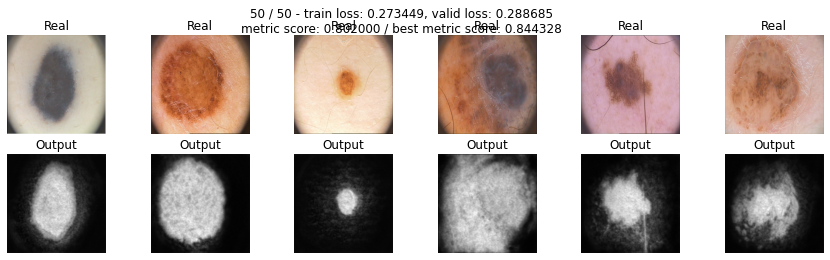

In [ ]:
# segnet_focal_model
device = 'cuda'
# если уже модель существует, удалим ее, чтобы освободить память
if 'segnet_focal_model' in globals():
    del segnet_focal_model, optimizer, scheduler
    torch.cuda.empty_cache()
    gc.collect()

segnet_focal_model = SegNet()
segnet_focal_model = segnet_focal_model.to(device)
optimizer = torch.optim.AdamW(segnet_focal_model.parameters(), lr=0.001, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 50, 75, 100], gamma=0.75)
max_epochs = 50

segnet_focal_model, segnet_focal_model_name, segnet_focal_losses_history = train(segnet_focal_model, optimizer, scheduler, 
                                                                                focal_loss, score_model, max_epochs, 
                                                                                data_tr, data_val, model_name='segnet_focal_model')

In [ ]:
save_file(segnet_focal_losses_history, 'segnet_focal_losses_history')
segnet_focal_losses_history_loaded_from = load_file('segnet_focal_losses_history')
segnet_focal_losses_history == segnet_focal_losses_history_loaded_from

True

----------------------------------------------------------------------------------------------

## [BONUS] Мир сегментационных лоссов [5 баллов]

В данном блоке предлагаем вам написать одну функцию потерь самостоятельно. Для этого необходимо прочитать статью и имплементировать ее. Кроме тако провести численное сравнение с предыдущими функциями.
Какие варианты? 

1) Можно учесть Total Variation
2) Lova
3) BCE но с Soft Targets (что-то типа label-smoothing для многослассовой классификации)
4) Любой другой 

* [Physiological Inspired Deep Neural Networks for Emotion Recognition](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8472816&tag=1)". IEEE Access, 6, 53930-53943.

* [Boundary loss for highly unbalanced segmentation](https://arxiv.org/abs/1812.07032)

* [Tversky loss function for image segmentation using 3D fully convolutional deep networks](https://arxiv.org/abs/1706.05721)

* [Correlation Maximized Structural Similarity Loss for Semantic Segmentation](https://arxiv.org/abs/1910.08711)

* [Topology-Preserving Deep Image Segmentation](https://papers.nips.cc/paper/8803-topology-preserving-deep-image-segmentation)

Так как Тверский лосс очень похож на данные выше, то за него будет проставлено только 3 балла (при условии, если в модели нет ошибок при обучении). Постарайтесь сделать что-то интереснее.

Реализована [вот эта функция](https://arxiv.org/abs/1705.08790) под бинарные данные

In [ ]:
class LovaszLoss(nn.Module):
    """Binary Lovasz hinge loss"""

    def __init__(self, alpha=2.0, erosions=10, **kwargs):
        super(LovaszLoss, self).__init__()
        
    def lovasz_hinge(self, logits, labels, per_image=True, ignore=None):
        if per_image:
            loss = self.mean(self.lovasz_hinge_flat(*self.flatten_binary_scores(log.unsqueeze(0), lab.unsqueeze(0), ignore))
                              for log, lab in zip(logits, labels))
        else:
            loss = self.lovasz_hinge_flat(*self.flatten_binary_scores(logits, labels, ignore))
        return loss

    def lovasz_hinge_flat(self, logits, labels):
        if len(labels) == 0:
            return logits.sum() * 0.
        signs = 2. * labels.float() - 1.
        errors = (1. - logits * Variable(signs))
        errors_sorted, perm = torch.sort(errors, dim=0, descending=True)
        perm = perm.data
        gt_sorted = labels[perm]
        grad = self.lovasz_grad(gt_sorted)
        loss = torch.dot(F.relu(errors_sorted), Variable(grad))
        return loss

        
    def mean(self, l, ignore_nan=False, empty=0):
        l = iter(l)
        if ignore_nan:
            l = ifilterfalse(isnan, l)
        try:
            n = 1
            acc = next(l)
        except StopIteration:
            if empty == 'raise':
                raise ValueError('Empty mean')
            return empty
        for n, v in enumerate(l, 2):
            acc += v
        if n == 1:
            return acc
        return acc / n
    
    def lovasz_grad(self, gt_sorted):
        p = len(gt_sorted)
        gts = gt_sorted.sum()
        intersection = gts - gt_sorted.float().cumsum(0)
        union = gts + (1 - gt_sorted).float().cumsum(0)
        jaccard = 1. - intersection / union
        if p > 1: # cover 1-pixel case
            jaccard[1:p] = jaccard[1:p] - jaccard[0:-1]
        return jaccard


    def flatten_binary_scores(self, scores, labels, ignore=None):
        scores = scores.view(-1)
        labels = labels.view(-1)
        if ignore is None:
            return scores, labels
        valid = (labels != ignore)
        vscores = scores[valid]
        vlabels = labels[valid]
        return vscores, vlabels

    def forward(self, output, target):
        """Inputs:
        output: logits
        target: real value (0s and 1s)
        """
        loss = self.lovasz_hinge(output, target)
        return loss

In [ ]:
# удлаить предыдущую модель
del segnet_focal_model, optimizer, scheduler
torch.cuda.empty_cache()
gc.collect()

21574

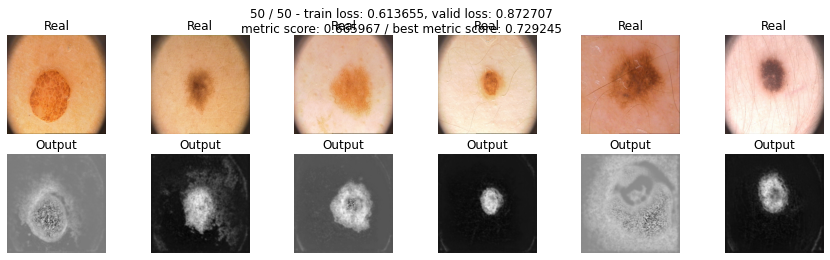

In [ ]:
# segnet_lovasz_model

# если уже модель существует, удалим ее, чтобы освободить память
if 'segnet_lovasz_model' in globals():
    del segnet_lovasz_model, optimizer, scheduler
    torch.cuda.empty_cache()
    gc.collect()


segnet_lovasz_model = SegNet()
segnet_lovasz_model = segnet_lovasz_model.to(device)
optimizer = torch.optim.AdamW(segnet_lovasz_model.parameters(), lr=0.001, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 50, 75, 100], gamma=0.75)
lovasz_loss = LovaszLoss()
max_epochs = 50

segnet_lovasz_model, segnet_lovasz_model_name, segnet_lovasz_losses_history = train(segnet_lovasz_model, optimizer, scheduler, 
                                                                                lovasz_loss, score_model, max_epochs, 
                                                                                data_tr, data_val, model_name='segnet_lovasz_model')

In [ ]:
save_file(segnet_lovasz_losses_history, 'segnet_lovasz_losses_history')
segnet_lovasz_losses_history_loaded_from = load_file('segnet_lovasz_losses_history')
segnet_lovasz_losses_history == segnet_lovasz_losses_history_loaded_from

True

## Другой вариант(на случай, если первый был неправильный)

In [ ]:
class BinaryTverskyLoss(nn.Module):
    def __init__(self, alpha=0.3, beta=0.7, smooth=1):
        super(BinaryTverskyLoss, self).__init__()
        
        self.alpha = alpha
        self.beta = beta
        self.smooth = smooth
        s = self.beta + self.alpha
        if s != 1:
            self.beta = self.beta / s
            self.alpha = self.alpha / s

    def forward(self, outputs, targets, mask=None):
        outputs = torch.sigmoid(outputs)       

        outputs = outputs.view(-1)
        targets = targets.view(-1)
        
        # Считаем True Positives, False Positives и False Negatives
        TP = (outputs * targets).sum()    
        FP = ((1 - targets) * outputs).sum()
        FN = (targets * (1 - outputs)).sum()
       
        tversky_index = (TP + self.smooth) / (TP + self.alpha*FP + self.beta*FN + self.smooth)  
        
        return 1.0 - tversky_index     

In [ ]:
# удлаить предыдущую модель
del segnet_lovasz_model, optimizer, scheduler
torch.cuda.empty_cache()
gc.collect()

21606

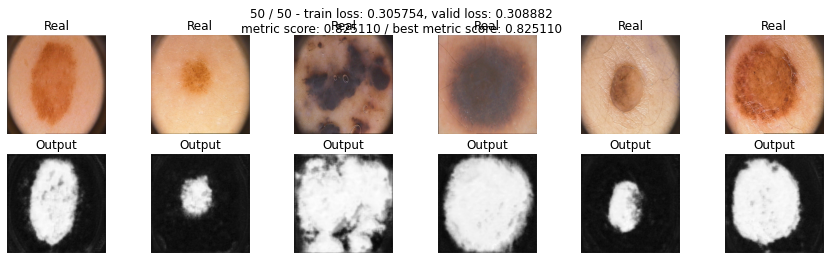

In [ ]:
# segnet_tversky_model

# если уже модель существует, удалим ее, чтобы освободить память
if 'segnet_tversky_model' in globals():
    del segnet_tversky_model, optimizer, scheduler
    torch.cuda.empty_cache()
    gc.collect()


segnet_tversky_model = SegNet()
segnet_tversky_model = segnet_tversky_model.to(device)
optimizer = torch.optim.AdamW(segnet_tversky_model.parameters(), lr=0.001, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 50, 75, 100], gamma=0.75)
tversky_loss = BinaryTverskyLoss()
max_epochs = 50

segnet_tversky_model, segnet_tversky_model_name, segnet_tversky_losses_history = train(segnet_tversky_model, optimizer, scheduler, 
                                                                                 tversky_loss, score_model, max_epochs, 
                                                                                 data_tr, data_val, model_name='segnet_tversky_model')

In [ ]:
save_file(segnet_tversky_losses_history, 'segnet_tversky_losses_history')
segnet_tversky_losses_history_loaded_from = load_file('segnet_tversky_losses_history')
segnet_tversky_losses_history == segnet_tversky_losses_history_loaded_from

True

-----------------------------------------------------------------------------------------

# U-Net [2 балла]

[**U-Net**](https://arxiv.org/abs/1505.04597) — это архитектура нейронной сети, которая получает изображение и выводит его. Первоначально он был задуман для семантической сегментации (как мы ее будем использовать), но он настолько успешен, что с тех пор используется в других контекстах. Получая на вход медицинское изображение, он выведет изображение в оттенках серого, где интенсивность каждого пикселя зависит от вероятности того, что этот пиксель принадлежит интересующей нас области.

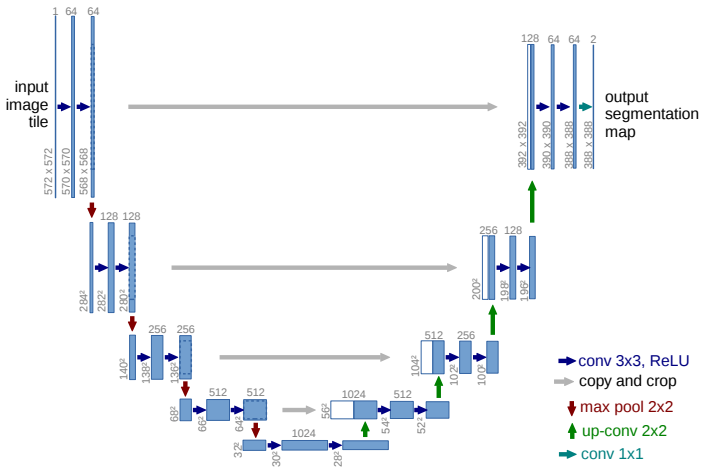

У нас в архитектуре все так же существует энкодер и декодер, как в **SegNet**, но отличительной особеностью данной модели являются *skip-conenctions*, соединяющие части декодера и энкодера. То есть для того чтобы передать на вход декодера тензор, мы конкатенируем симметричный выход с энкодера и выход предыдущего слоя декодера.

* Ronneberger, Olaf, Philipp Fischer, and Thomas Brox. "[U-Net: Convolutional networks for biomedical image segmentation.](https://arxiv.org/pdf/1505.04597.pdf)" International Conference on Medical image computing and computer-assisted intervention. Springer, Cham, 2015.

In [ ]:
class UNet(nn.Module):
    def __init__(self):
        super().__init__()
        
        ######
        #номера слоев считать по уровням сверху вниз, слева направо
        ######
        
        # encoder (downsampling)
        self.enc_conv0 = nn.Sequential(
          # 1, conv+bn+relu
          nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(inplace=True),

          # 2, conv+bn+relu
          nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(inplace=True),
        )

        # 3, pool
        self.pool0 = nn.MaxPool2d(2, 2)  # 256 -> 128

        self.enc_conv1 = nn.Sequential(
          # 4, conv+bn+relu
          nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(128),
          nn.ReLU(inplace=True),

          # 5, conv+bn+relu
          nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(128),
          nn.ReLU(inplace=True),
        )

        # 6, pool
        self.pool1 = nn.MaxPool2d(2, 2) # 128 -> 64

        self.enc_conv2 = nn.Sequential(
          # 7, conv+bn+relu
          nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(256),
          nn.ReLU(inplace=True),

          # 8, conv+bn+relu
          nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(256),
          nn.ReLU(inplace=True),
        )
    
        # 9, pool
        self.pool2 = nn.MaxPool2d(2, 2) # 64 -> 32

        self.enc_conv3 = nn.Sequential(
          # 10, conv+bn+relu
          nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(inplace=True),

          # 11, conv+bn+relu
          nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(inplace=True),
        )
        
        # 12, pool
        self.pool3 = nn.MaxPool2d(2, 2) # 32 -> 16

        # bottleneck
        self.bottleneck_conv = nn.Sequential(
          # 13, conv+bn+relu
          nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(1024),
          nn.ReLU(inplace=True),

          # 14, conv+bn+relu
          nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(1024),
          nn.ReLU(inplace=True),
        )

        
        
        # decoder (upsampling)
        
        # 15, upsample
        self.upsample0 = nn.Upsample(32)     # 16 -> 32

        self.dec_conv0 = nn.Sequential(
          # 16, conv+bn+relu
          nn.Conv2d(in_channels=1024 + 512, out_channels=512, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(inplace=True),

          # 17, conv+bn+relu
          nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(inplace=True),
        )

        # 18, upsample
        self.upsample1 = nn.Upsample(64)     # 32 -> 64

        self.dec_conv1 = nn.Sequential(
          # 19, conv+bn+relu
          nn.Conv2d(in_channels=512 + 256, out_channels=256, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(256),
          nn.ReLU(inplace=True),

          # 20, conv+bn+relu
          nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(256),
          nn.ReLU(inplace=True),
        )

        # 21, upsample
        self.upsample2 = nn.Upsample(128)    # 64 -> 128

        self.dec_conv2 = nn.Sequential(
          # 22, conv+bn+relu
          nn.Conv2d(in_channels=256 + 128, out_channels=128, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(128),
          nn.ReLU(inplace=True),

          # 23, conv+bn+relu
          nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(128),
          nn.ReLU(inplace=True),
        )

        # 24, upsample
        self.upsample3 =  nn.Upsample(256)     # 128 -> 256  

        self.dec_conv3 = nn.Sequential(
          # 25, conv+bn+relu
          nn.Conv2d(in_channels=128 + 64, out_channels=64, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(inplace=True),

          # 26, conv+bn+relu
          nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(inplace=True),
            
          # 27, conv+bn
          nn.Conv2d(in_channels=64, out_channels=1, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(1)
#         nn.ReLU(inplace=True)
        )

    def forward(self, x):
        # encoder
        ##enc0
        e0 = self.enc_conv0(x)
        
        ##enc1
        e1 = self.enc_conv1(self.pool0(e0))
        
        ##enc2
        e2 = self.enc_conv2(self.pool1(e1))
        
        ##enc3
        e3 = self.enc_conv3(self.pool2(e2))
        

        # bottleneck
        bn = self.bottleneck_conv(self.pool3(e3))

        
        # decoder
        ##dec0
        d0 = self.upsample0(bn)
        d0 = torch.cat((d0, e3), dim=1)
        d0 = self.dec_conv0(d0)
        
        ##dec1
        d1 = self.upsample1(d0)
        d1 = torch.cat((d1, e2), dim=1)
        d1 = self.dec_conv1(d1)
        
        #dec2
        d2 = self.upsample2(d1)
        d2 = torch.cat((d2, e1), dim=1)
        d2 = self.dec_conv2(d2)
        
        #dec2
        d3 = self.upsample3(d2)
        d3 = torch.cat((d3, e0), dim=1)
        d3 = self.dec_conv3(d3) 
        
        return d3 #no activation

## Тест лосс-функций для U-Net 

### BCELoss

In [ ]:
# удлаить предыдущую модель
# del segnet_tversky_model, optimizer, scheduler
torch.cuda.empty_cache()
gc.collect()

1145

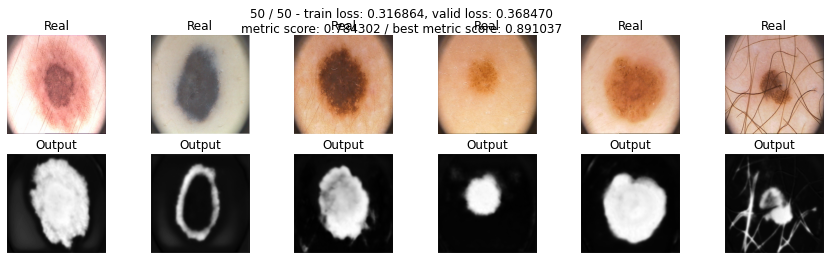

In [ ]:
# unet_bce_model

# если уже модель существует, удалим ее, чтобы освободить память
if 'unet_bce_model' in globals():
    del unet_bce_model, optimizer, scheduler
    torch.cuda.empty_cache()
    gc.collect()

unet_bce_model = UNet()
unet_bce_model = unet_bce_model.to(device)
optimizer = torch.optim.AdamW(unet_bce_model.parameters(), lr=0.001, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 50, 75, 100], gamma=0.75)
max_epochs = 50

unet_bce_model, unet_bce_model_name, unet_bce_losses_history = train(unet_bce_model, optimizer, scheduler, 
                                                                                 bce_loss, score_model, max_epochs, 
                                                                                 data_tr, data_val, model_name='unet_bce_model')

In [ ]:
save_file(unet_bce_losses_history, 'unet_bce_losses_history')
unet_bce_losses_history_loaded_from = load_file('unet_bce_losses_history')
unet_bce_losses_history == unet_bce_losses_history_loaded_from

True

### DiceLoss 

In [ ]:
# удлаить предыдущую модель
del unet_bce_model, optimizer, scheduler
torch.cuda.empty_cache()
gc.collect()

21574

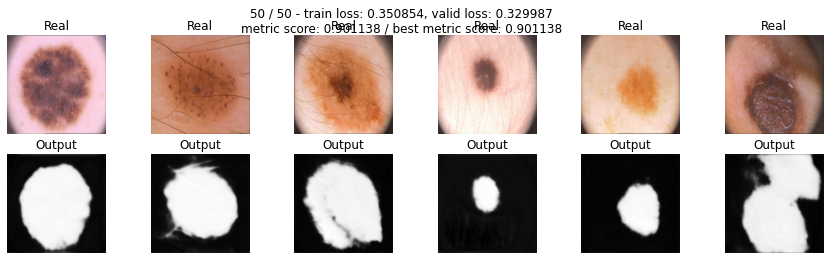

In [ ]:
# unet_dice_model

# если уже модель существует, удалим ее, чтобы освободить память
if 'unet_dice_model' in globals():
    del unet_dice_model, optimizer, scheduler
    torch.cuda.empty_cache()
    gc.collect()

unet_dice_model = UNet()
unet_dice_model = unet_dice_model.to(device)
optimizer = torch.optim.AdamW(unet_dice_model.parameters(), lr=0.001, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 50, 75, 100], gamma=0.75)
max_epochs = 50

unet_dice_model, unet_dice_model_name, unet_dice_losses_history = train(unet_dice_model, optimizer, scheduler, 
                                                                                 dice_loss, score_model, max_epochs, 
                                                                                 data_tr, data_val, model_name='unet_dice_model')

In [ ]:
save_file(unet_dice_losses_history, 'unet_dice_losses_history')
unet_dice_losses_history_loaded_from = load_file('unet_dice_losses_history')
unet_dice_losses_history == unet_dice_losses_history_loaded_from

True

## FocalLoss

In [ ]:
# удлаить предыдущую модель
del unet_dice_model, optimizer, scheduler
torch.cuda.empty_cache()
gc.collect()

21886

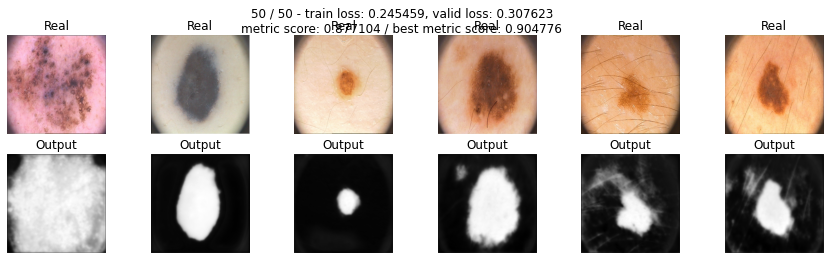

In [ ]:
# unet_focal_model

# если уже модель существует, удалим ее, чтобы освободить память
if 'unet_focal_model' in globals():
    del unet_focal_model, optimizer, scheduler
    torch.cuda.empty_cache()
    gc.collect()

unet_focal_model = UNet()
unet_focal_model = unet_focal_model.to(device)
optimizer = torch.optim.AdamW(unet_focal_model.parameters(), lr=0.001, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 50, 75, 100], gamma=0.75)
max_epochs = 50

unet_focal_model, unet_focal_model_name, unet_focal_losses_history = train(unet_focal_model, optimizer, scheduler, 
                                                                                 focal_loss, score_model, max_epochs, 
                                                                                 data_tr, data_val, model_name='unet_focal_model')

In [ ]:
save_file(unet_focal_losses_history, 'unet_focal_losses_history')
unet_focal_losses_history_loaded_from = load_file('unet_focal_losses_history')
unet_focal_losses_history == unet_focal_losses_history_loaded_from

True

### LovaszLoss 

In [ ]:
# удлаить предыдущую модель
del unet_dice_model, optimizer, scheduler
torch.cuda.empty_cache()
gc.collect()

21584

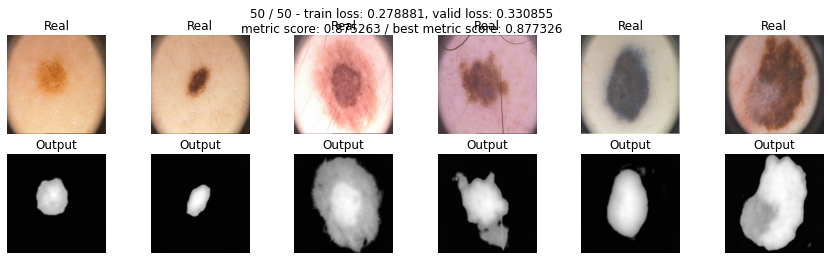

In [ ]:
# unet_lovasz_model

# если уже модель существует, удалим ее, чтобы освободить память
if 'unet_lovasz_model' in globals():
    del unet_lovasz_model, optimizer, scheduler
    torch.cuda.empty_cache()
    gc.collect()

unet_lovasz_model = UNet()
unet_lovasz_model = unet_lovasz_model.to(device)
optimizer = torch.optim.AdamW(unet_lovasz_model.parameters(), lr=0.001, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 50, 75, 100], gamma=0.75)
lovasz_loss = LovaszLoss()
max_epochs = 50

unet_lovasz_model, unet_lovasz_model_name, unet_lovasz_losses_history = train(unet_lovasz_model, optimizer, scheduler, 
                                                                                 lovasz_loss, score_model, max_epochs, 
                                                                                 data_tr, data_val, model_name='unet_lovasz_model')

In [ ]:
save_file(unet_lovasz_losses_history, 'unet_lovasz_losses_history')
unet_lovasz_losses_history_loaded_from = load_file('unet_lovasz_losses_history')
unet_lovasz_losses_history == unet_lovasz_losses_history_loaded_from

True

### TverskyLoss 

In [ ]:
# удлаить предыдущую модель
del unet_lovasz_model, optimizer, scheduler
torch.cuda.empty_cache()
gc.collect()

1152

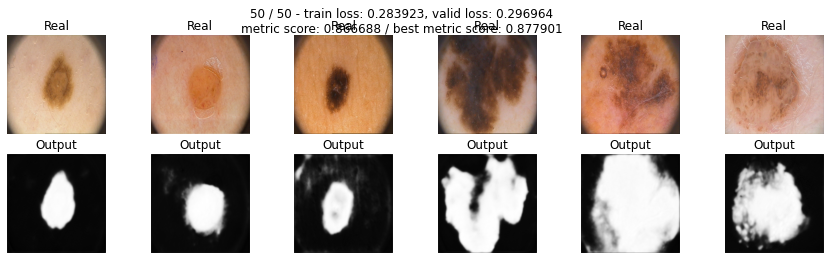

In [ ]:
# unet_tversky_model
device='cuda'
# если уже модель существует, удалим ее, чтобы освободить память
if 'unet_tversky_model' in globals():
    del unet_tversky_model, optimizer, scheduler
    torch.cuda.empty_cache()
    gc.collect()

unet_tversky_model = UNet()
unet_tversky_model = unet_tversky_model.to(device)
optimizer = torch.optim.AdamW(unet_tversky_model.parameters(), lr=0.001, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 50, 75, 100], gamma=0.75)
tversky_loss = BinaryTverskyLoss()
max_epochs = 50

unet_tversky_model, unet_tversky_model_name, unet_tversky_losses_history = train(unet_tversky_model, optimizer, scheduler, 
                                                                                 tversky_loss, score_model, max_epochs, 
                                                                                 data_tr, data_val, model_name='unet_tversky_model')

In [ ]:
save_file(unet_tversky_losses_history, 'unet_tversky_losses_history')
unet_tversky_losses_history_loaded_from = load_file('unet_tversky_losses_history')
unet_tversky_losses_history == unet_tversky_losses_history_loaded_from

True

Новая модель путем изменения типа пулинга:

 **Max-Pooling** for the downsampling and **nearest-neighbor Upsampling** for the upsampling.

Down-sampling:

        conv = nn.Conv2d(3, 64, 3, padding=1)
        pool = nn.MaxPool2d(3, 2, padding=1)

Up-Sampling

        upsample = nn.Upsample(32)
        conv = nn.Conv2d(64, 64, 3, padding=1)

Замените max-pooling на convolutions с stride=2 и upsampling на transpose-convolutions с stride=2.


In [ ]:
class UNet2(nn.Module):
    def __init__(self):
        super().__init__()
        
        ######
        #номера слоев считать по уровням сверху вниз, слева направо
        ######
        
        # encoder (downsampling)
        self.enc_conv0 = nn.Sequential(
          # 1, conv+bn+relu
          nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(inplace=True),

          # 2, conv+bn+relu
          nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(inplace=True),
        )

        # 3, pool
        self.pool0 =  nn.Conv2d(
            in_channels=64, out_channels=64, kernel_size=2, stride=2
        )  # 256 -> 128

        self.enc_conv1 = nn.Sequential(
          # 4, conv+bn+relu
          nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(128),
          nn.ReLU(inplace=True),

          # 5, conv+bn+relu
          nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(128),
          nn.ReLU(inplace=True),
        )

        # 6, pool
        self.pool1 = nn.Conv2d(
            in_channels=128, out_channels=128, kernel_size=2, stride=2
        ) # 128 -> 64

        self.enc_conv2 = nn.Sequential(
          # 7, conv+bn+relu
          nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(256),
          nn.ReLU(inplace=True),

          # 8, conv+bn+relu
          nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(256),
          nn.ReLU(inplace=True),
        )
    
        # 9, pool
        self.pool2 = nn.Conv2d(
            in_channels=256, out_channels=256, kernel_size=2, stride=2
        ) # 64 -> 32

        self.enc_conv3 = nn.Sequential(
          # 10, conv+bn+relu
          nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(inplace=True),

          # 11, conv+bn+relu
          nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(inplace=True),
        )
        
        # 12, pool
        self.pool3 = nn.Conv2d(
            in_channels=512, out_channels=512, kernel_size=2, stride=2
        ) # 32 -> 16

        # bottleneck
        self.bottleneck_conv = nn.Sequential(
          # 13, conv+bn+relu
          nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(1024),
          nn.ReLU(inplace=True),

          # 14, conv+bn+relu
          nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(1024),
          nn.ReLU(inplace=True),
        )

        
        
        # decoder (upsampling)
        
        # 15, upsample
        self.upsample0 = nn.ConvTranspose2d(
            in_channels=1024, out_channels=512, kernel_size=2, stride=2
        )     # 16 -> 32

        self.dec_conv0 = nn.Sequential(
          # 16, conv+bn+relu
          nn.Conv2d(in_channels=512 * 2, out_channels=512, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(inplace=True),

          # 17, conv+bn+relu
          nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(inplace=True),
        )

        # 18, upsample
        self.upsample1 = nn.ConvTranspose2d(
            in_channels=512, out_channels=256, kernel_size=2, stride=2
        )     # 32 -> 64

        self.dec_conv1 = nn.Sequential(
          # 19, conv+bn+relu
          nn.Conv2d(in_channels=256 * 2, out_channels=256, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(256),
          nn.ReLU(inplace=True),

          # 20, conv+bn+relu
          nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(256),
          nn.ReLU(inplace=True),
        )

        # 21, upsample
        self.upsample2 = nn.ConvTranspose2d(
            in_channels=256, out_channels=128, kernel_size=2, stride=2
        )    # 64 -> 128

        self.dec_conv2 = nn.Sequential(
          # 22, conv+bn+relu
          nn.Conv2d(in_channels=128 * 2, out_channels=128, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(128),
          nn.ReLU(inplace=True),

          # 23, conv+bn+relu
          nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(128),
          nn.ReLU(inplace=True),
        )

        # 24, upsample
        self.upsample3 =  nn.ConvTranspose2d(
            in_channels=128, out_channels=64, kernel_size=2, stride=2
        )     # 128 -> 256  

        self.dec_conv3 = nn.Sequential(
          # 25, conv+bn+relu
          nn.Conv2d(in_channels=64 * 2, out_channels=64, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(inplace=True),

          # 26, conv+bn+relu
          nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(inplace=True),
            
          # 27, conv+bn
          nn.Conv2d(in_channels=64, out_channels=1, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(1)
#         nn.ReLU(inplace=True)
        )

    def forward(self, x):
        # encoder
        ##enc0
        e0 = self.enc_conv0(x)
        ##enc1
        e1 = self.enc_conv1(self.pool0(e0))
        ##enc2
        e2 = self.enc_conv2(self.pool1(e1))
        ##enc3
        e3 = self.enc_conv3(self.pool2(e2))

        
        # bottleneck
        bn = self.bottleneck_conv(self.pool3(e3))

        
        # decoder
        ##dec0
        d0 = self.upsample0(bn)
        d0 = torch.cat((d0, e3), dim=1)
        d0 = self.dec_conv0(d0)
        
        ##dec1
        d1 = self.upsample1(d0)
        d1 = torch.cat((d1, e2), dim=1)
        d1 = self.dec_conv1(d1)
        
        #dec2
        d2 = self.upsample2(d1)
        d2 = torch.cat((d2, e1), dim=1)
        d2 = self.dec_conv2(d2)
        
        #dec2
        d3 = self.upsample3(d2)
        d3 = torch.cat((d3, e0), dim=1)
        d3 = self.dec_conv3(d3) 
        
        return d3 #no activation

## Тест лосс-функций для U-Net2 

### BCELoss

In [ ]:
# удлаить предыдущую модель
del unet_tversky_model, optimizer, scheduler
torch.cuda.empty_cache()
gc.collect()

21630

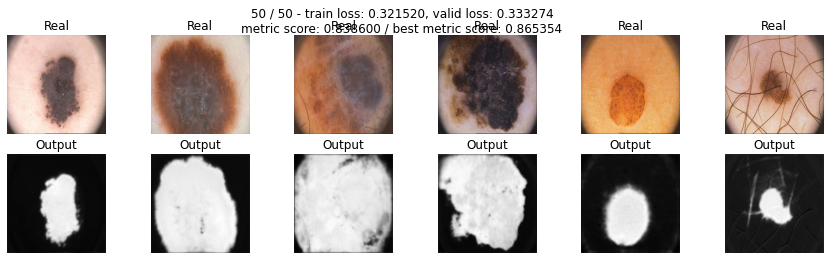

In [ ]:
# unet2_bce_model

# если уже модель существует, удалим ее, чтобы освободить память
if 'unet2_bce_model' in globals():
    del unet2_bce_model, optimizer, scheduler
    torch.cuda.empty_cache()
    gc.collect()

unet2_bce_model = UNet2()
unet2_bce_model = unet2_bce_model.to(device)
optimizer = torch.optim.AdamW(unet2_bce_model.parameters(), lr=0.001, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 50, 75, 100], gamma=0.75)
max_epochs = 50

unet2_bce_model, unet2_bce_model_name, unet2_bce_losses_history = train(unet2_bce_model, optimizer, scheduler, 
                                                                                 bce_loss, score_model, max_epochs, 
                                                                                 data_tr, data_val, model_name='unet2_bce_model')

In [ ]:
save_file(unet2_bce_losses_history, 'unet2_bce_losses_history')
unet2_bce_losses_history_loaded_from = load_file('unet2_bce_losses_history')
unet2_bce_losses_history == unet2_bce_losses_history_loaded_from

True

### DiceLoss 

In [ ]:
# удлаить предыдущую модель
del unet2_bce_model, optimizer, scheduler
torch.cuda.empty_cache()
gc.collect()

21652

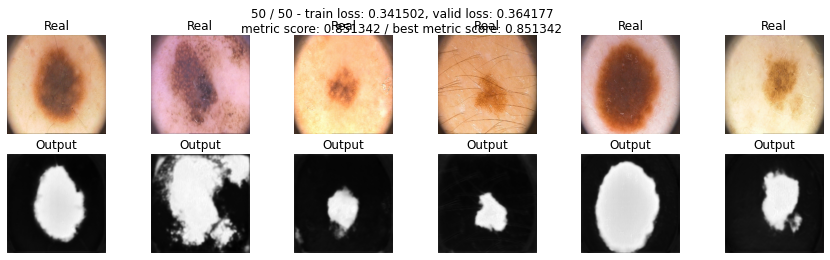

In [ ]:
# unet2_dice_model

# если уже модель существует, удалим ее, чтобы освободить память
if 'unet2_dice_model' in globals():
    del unet2_dice_model, optimizer, scheduler
    torch.cuda.empty_cache()
    gc.collect()

unet2_dice_model = UNet2()
unet2_dice_model = unet2_dice_model.to(device)
optimizer = torch.optim.AdamW(unet2_dice_model.parameters(), lr=0.001, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 50, 75, 100], gamma=0.75)
max_epochs = 50

unet2_dice_model, unet2_dice_model_name, unet2_dice_losses_history = train(unet2_dice_model, optimizer, scheduler, 
                                                                                 dice_loss, score_model, max_epochs, 
                                                                                 data_tr, data_val, model_name='unet2_dice_model')

In [ ]:
save_file(unet2_dice_losses_history, 'unet2_dice_losses_history')
unet2_dice_losses_history_loaded_from = load_file('unet2_dice_losses_history')
unet2_dice_losses_history == unet2_dice_losses_history_loaded_from

## FocalLoss

In [ ]:
# удлаить предыдущую модель
del unet2_dice_model, optimizer, scheduler
torch.cuda.empty_cache()
gc.collect()

21626

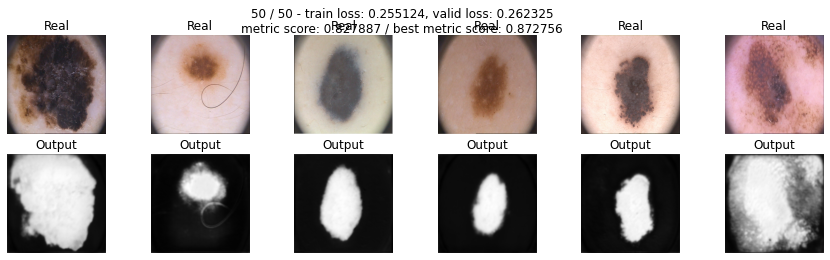

In [ ]:
# unet2_focal_model

# если уже модель существует, удалим ее, чтобы освободить память
if 'unet2_focal_model' in globals():
    del unet2_focal_model, optimizer, scheduler
    torch.cuda.empty_cache()
    gc.collect()

unet2_focal_model = UNet2()
unet2_focal_model = unet2_focal_model.to(device)
optimizer = torch.optim.AdamW(unet2_focal_model.parameters(), lr=0.001, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 50, 75, 100], gamma=0.75)
max_epochs = 50

unet2_focal_model, unet2_focal_model_name, unet2_focal_losses_history = train(unet2_focal_model, optimizer, scheduler, 
                                                                                 focal_loss, score_model, max_epochs, 
                                                                                 data_tr, data_val, model_name='unet2_focal_model')

In [ ]:
save_file(unet2_focal_losses_history, 'unet2_focal_losses_history')
unet2_focal_losses_history_loaded_from = load_file('unet2_focal_losses_history')
unet2_focal_losses_history == unet2_focal_losses_history_loaded_from

True

### LovaszLoss 

In [ ]:
# удлаить предыдущую модель
del unet2_focal_model, optimizer, scheduler
torch.cuda.empty_cache()
gc.collect()

21678

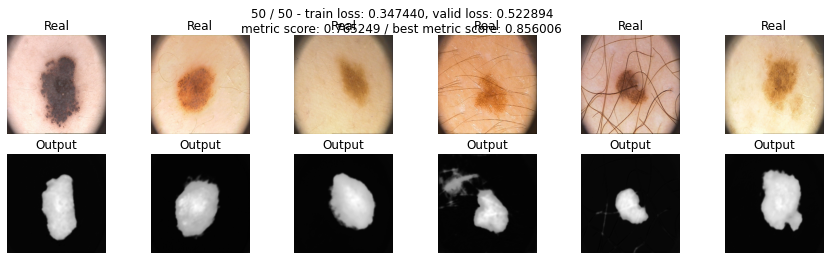

In [ ]:
# unet2_lovasz_model
device = 'cuda'
# если уже модель существует, удалим ее, чтобы освободить память
if 'unet2_lovasz_model' in globals():
    del unet2_lovasz_model, optimizer, scheduler
    torch.cuda.empty_cache()
    gc.collect()

unet2_lovasz_model = UNet2()
unet2_lovasz_model = unet2_lovasz_model.to(device)
optimizer = torch.optim.AdamW(unet2_lovasz_model.parameters(), lr=0.001, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 50, 75, 100], gamma=0.75)
lovasz_loss = LovaszLoss()
max_epochs = 50

unet2_lovasz_model, unet2_lovasz_model_name, unet2_lovasz_losses_history = train(unet2_lovasz_model, optimizer, scheduler, 
                                                                                 lovasz_loss, score_model, max_epochs, 
                                                                                 data_tr, data_val, model_name='unet2_lovasz_model')

In [ ]:
save_file(unet2_lovasz_losses_history, 'unet2_lovasz_losses_history')
unet2_lovasz_losses_history_loaded_from = load_file('unet2_lovasz_losses_history')
unet2_lovasz_losses_history == unet2_lovasz_losses_history_loaded_from

True

### TverskyLoss 

In [ ]:
# удлаить предыдущую модель
del unet2_lovasz_model, optimizer, scheduler
torch.cuda.empty_cache()
gc.collect()

21626

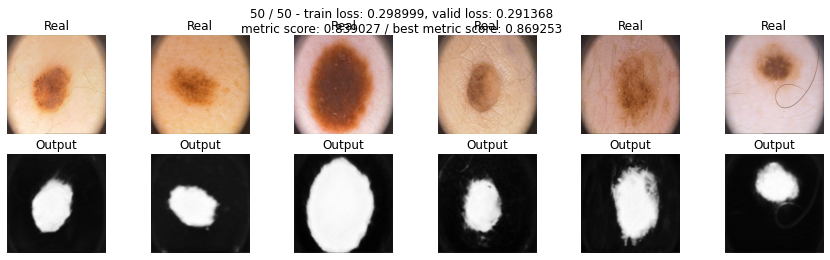

In [ ]:
# unet2_tversky_model

# если уже модель существует, удалим ее, чтобы освободить память
if 'unet2_tversky_model' in globals():
    del unet2_tversky_model, optimizer, scheduler
    torch.cuda.empty_cache()
    gc.collect()

unet2_tversky_model = UNet2()
unet2_tversky_model = unet2_tversky_model.to(device)
optimizer = torch.optim.AdamW(unet2_tversky_model.parameters(), lr=0.001, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 50, 75, 100], gamma=0.75)
tversky_loss = BinaryTverskyLoss()
max_epochs = 50

unet2_tversky_model, unet2_tversky_model_name, unet2_tversky_losses_history = train(unet2_tversky_model, optimizer, scheduler, 
                                                                                 tversky_loss, score_model, max_epochs, 
                                                                                 data_tr, data_val, model_name='unet2_tversky_model')

In [ ]:
save_file(unet2_tversky_losses_history, 'unet2_tversky_losses_history')
unet2_tversky_losses_history_loaded_from = load_file('unet2_tversky_losses_history')
unet2_tversky_losses_history == unet2_tversky_losses_history_loaded_from

True

Сделайте вывод, какая из моделей лучше

# Отчет (6 баллов): 
Ниже предлагается написать отчет о проделанно работе и построить графики для лоссов, метрик на валидации и тесте. 
Если вы пропустили какую-то часть в задании выше, то вы все равно можете получить основную часть баллов в отчете, если правильно зададите проверяемые вами гипотезы.


Аккуратно сравните модели между собой и соберите наилучшую архитектуру. Проверьте каждую модель с различными лоссами. Мы не ограничиваем вас в формате отчета, но проверяющий должен отчетливо понять для чего построен каждый график, какие выводы вы из него сделали и какой общий вывод можно сделать на основании данных моделей. Если вы захотите добавить что-то еще, чтобы увеличить шансы получения максимального балла, то добавляйте отдельное сравнение.

Дополнительные комментарии: 

Пусть у вас есть N обученных моделей.
- Является ли отчетом N графиков с 1 линей? Да, но очень низкокачественным, потому что проверяющий не сможет сам сравнить их.

- Является ли отчетом 1 график с N линиями? Да, но скорее всего таким образом вы отразили лишь один эффект. Этого мало, чтобы сделать досточно суждений по поводу вашей работа.

- Я проверял метрики на трейне, и привел в результате таблицу с N числами, что не так? ключейвой момент тут, что вы измеряли на трейне ваши метрики, уверены ли вы, что заивисмости останутся такими же на отложенной выборке?

- Я сделал отчет содержащий график лоссов и метрик, и у меня нет ошибок в основной части, но за отчет не стоит максимум, почему? Естестественно максимум баллов за отчет можно получить не за 2 графика (даже при условии их полной правильности). Проверяющий хочет видеть больше сравнений моделей, чем метрики и лоссы (особенно, если они на трейне).

Советы: попробуйте правильно поставить вопрос на который вы себе отвечаете и продемонстрировать таблицу/график, помогающий проверяющему увидеть ответ на этот вопрос. Пример: Ваня хочет узнать, с каким из 4-х лоссов модель (например, U-Net) имеет наилучшее качество. Что нужно сделать Ване? Обучить 4 одинаковых модели с разными лосс функциями. И измерить итогововое качество. Продемонстрировать результаты своих измерений и итоговый вывод. (warning: конечно же, это не идеально ответит на наш вопрос, так как мы не учитываем в экспериментах возможные различные типы ошибок, но для первого приближения этого вполне достаточно).

Примерное время на подготовку отчета 1 час, он содержит сравнеение метрик, график лоссов, выбор лучших моделей из нескольких кластеров и выбор просто лучшей модели, небольшой вывод по всему дз, возможно сравнение результирующих сегментаций, времени или числа параметров модели, проявляйте креативность.

*стоит сразу оговориться, что если бы мы использовали пост-процессинг, то качество выходных картинок можно было бы еще улучшить и результат был бы похож на картинки из набора данных*

In [ ]:
import pandas as pd
# функции для отрисовки графиков

def convert_data(loaded_list):
    train_losses = loaded_list[0]
    valid_losses = loaded_list[1]
    metric_scores = loaded_list[2]
    dict_data = {'train' : train_losses, 'valid' : valid_losses, 'metric' : metric_scores}
    return dict_data

def convert_dict_list_to_double_list(full_histories, metric_type):
    res = []
    for i, hist in enumerate(full_histories):
        if metric_type=='mean':
            res.append(np.mean(hist['metric']))
        elif metric_type=='max':
            res.append(np.max(hist['metric']))
        elif metric_type=='mmm':
            mean = np.mean(hist['metric'])
            max = np.max(hist['metric'])
            mmm = mean * max
            res.append(mmm)
        else:
            return -2
    return res

def plot_results(history, ttl=''):
    plt.figure(figsize=(15, 9))
    plt.plot(history[0], label="train loss")
    plt.plot(history[1], label="valid loss")
    plt.plot(history[2], label="metric score")

    plt.legend(loc='best')
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title(ttl)
    plt.show()

def plot_one_result(history, ttl=''):
    plt.figure(figsize=(6, 6))
    plt.plot(history['train'], label="train loss", linewidth=3)
    plt.plot(history['valid'], label="valid loss", linewidth=3)
    plt.plot(history['metric'], label="metric score", linewidth=3)
    plt.legend(loc='best')
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title(ttl)
    plt.show()
    
def plot_several_results(list_history, model_type='', only_metric=False, use_lovacz=False):
    losses_names = ['BCE', 'Dice', 'Focal', 'Tversky']
    
    if use_lovacz == True:
        losses_names.insert(3, 'Lovasz')
    
    max_epochs = 50
    nplots = len(losses_names)
    
    if only_metric:
        nplots = 4
    
    fig, ax = plt.subplots(1, nplots, figsize=(16, 4))
    axe = ax.ravel()
    
    for num, (history, loss_name) in enumerate(zip(list_history, losses_names)):
        if only_metric==False:
            axe[num].plot(range(max_epochs), history['train'], label=f'train', linewidth=2)
            axe[num].plot(range(max_epochs), history['valid'], label=f'valid', linewidth=2)
        
        axe[num].plot(range(max_epochs), history['metric'], label=f'metric', color='green')
        
        if only_metric:
            axe[num].set_title(f'{model_type}+{loss_name}Loss IOU metric')
        else:
            axe[num].set_title(f'{model_type}+{loss_name}Loss')
        
        axe[num].legend()
    plt.tight_layout()
    
def plot_several_in_one(list_history, metric='metric', ylab='loss'):
    plt.figure(figsize=(20, 5))
    losses_names = ['BCE', 'Dice', 'Focal', 'Lovasz', 'Tversky']
    
    for history, loss_name in zip(list_history, losses_names):
        plt.plot(history[metric], label=loss_name, linewidth=3)

    plt.legend(loc='best')
    plt.xlabel("epochs")
    plt.ylabel(ylab)
    plt.show()
    
    
# # если функция отрисовки будет выдавать ошибку из-за того, что данные получены с cuda - использовать эту функцию
# def prepare_history_data_from_cuda(losses_history):
#     train_losses = torch.stack(losses_history[0])
#     train_losses = train_losses.detach().cpu().numpy()

#     valid_losses = torch.stack(losses_history[1])
#     valid_losses = valid_losses.detach().cpu().numpy()

#     metric_scores = np.array(bce_losses_history[2])
#     return ([train_losses, valid_losses, metric_scores])

In [ ]:
# переконвертируем данные для более удобной работы с графиками 
# импортируем данные segnet
segnet_bce_losses_history = convert_data(load_file('segnet_bce_losses_history'))
segnet_dice_losses_history = convert_data(load_file('segnet_dice_losses_history'))
segnet_focal_losses_history = convert_data(load_file('segnet_focal_losses_history'))
segnet_lovasz_losses_history = convert_data(load_file('segnet_lovasz_losses_history'))
segnet_tversky_losses_history = convert_data(load_file('segnet_tversky_losses_history'))
# импортируем данные unet
unet_bce_losses_history = convert_data(load_file('unet_bce_losses_history'))
unet_dice_losses_history = convert_data(load_file('unet_dice_losses_history'))
unet_focal_losses_history = convert_data(load_file('unet_focal_losses_history'))
unet_lovasz_losses_history = convert_data(load_file('unet_lovasz_losses_history'))
unet_tversky_losses_history = convert_data(load_file('unet_tversky_losses_history'))
# импортируем данные unet2
unet2_bce_losses_history = convert_data(load_file('unet2_bce_losses_history'))
unet2_dice_losses_history = convert_data(load_file('unet2_dice_losses_history'))
unet2_focal_losses_history = convert_data(load_file('unet2_focal_losses_history'))
unet2_lovasz_losses_history = convert_data(load_file('unet2_lovasz_losses_history'))
unet2_tversky_losses_history = convert_data(load_file('unet2_tversky_losses_history'))

In [ ]:
#удалим лишние данные
del segnet_bce_losses_history_loaded_from,
segnet_dice_losses_history_loaded_from,
segnet_focal_losses_history_loaded_from,
segnet_lovasz_losses_history_loaded_from,
segnet_tversky_losses_history_loaded_from,
unet_bce_losses_history_loaded_from,
unet_dice_losses_history_loaded_from,
unet_focal_losses_history_loaded_from,
unet_lovasz_losses_history_loaded_from,
unet_tversky_losses_history_loaded_from,
unet2_bce_losses_history_loaded_from,
unet2_dice_losses_history_loaded_from,
unet2_focal_losses_history_loaded_from,
unet2_lovasz_losses_history_loaded_from,
unet2_tversky_losses_history_loaded_from

### Сравнение лосс-функций для SegNet

Для начала сравним показатели train loss, valid loss и IOU metric score для BCE, Dice, Focal и Tversky, тк их лоссы не выходят за границы отрезка [0, 1], Lovasz рассмотрим отдельно

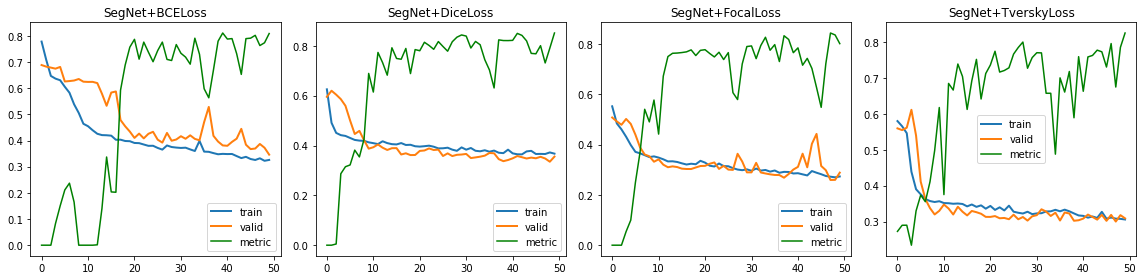

In [ ]:
segnet_part_histories = [segnet_bce_losses_history,
                    segnet_dice_losses_history,
                    segnet_focal_losses_history,
                    segnet_tversky_losses_history]

plot_several_results(segnet_part_histories, 'SegNet', False, False)

1. BCE: прямые сходяться друг к другу, но начинается переобучение
2. Dice: обучение идет спокойно, прямые сошлись и оба лосса идут на понижение.
3. Focal: на ~22 эпохе кривые трейна и валидации начали многократно пересекаться, что говорит о переобучении
4. Tversky: до ~28 эпохи обучение шло спокойно, потом началось переобучение

Теперь о Lovasz

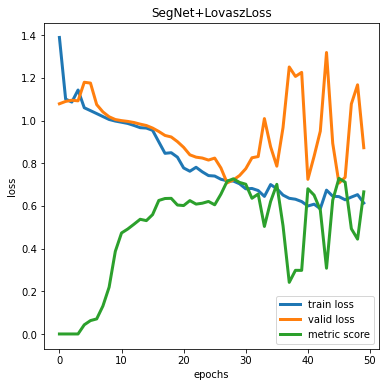

In [ ]:
plot_one_result(segnet_lovasz_losses_history, 'SegNet+LovaszLoss')

Lovacz: до ~29 эпохи обучение шло спокойно, потом началось переобучение и, в целом, модель стала очень нестабильна

Теперь построим общий график IOU metric score

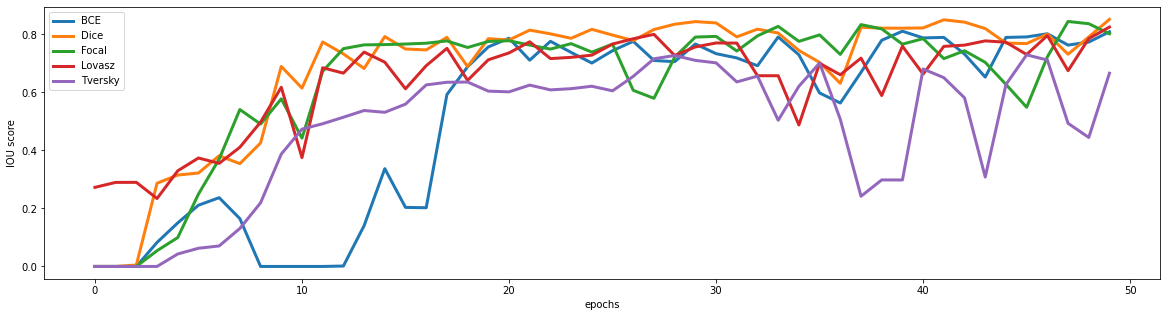

In [ ]:
segnet_full_histories = [segnet_bce_losses_history,
                    segnet_dice_losses_history,
                    segnet_focal_losses_history,
                    segnet_tversky_losses_history,
                    segnet_lovasz_losses_history]

plot_several_in_one(segnet_full_histories, 'metric', 'IOU score')

Выводы:
1. Наиболее стабильное обучение и результат показали BCE, Dice и Focal. 
2. Tversky очень нестабилен и показал худший результат
3. Наилучший итоговый результат у Dice
4. Все модели, кроме Dice переобучились

### Сравнение лосс-функций для UNet

Сначала также сравним графики для BCE, Dice, Focal и Tversky, потом отдельно для Lovasz

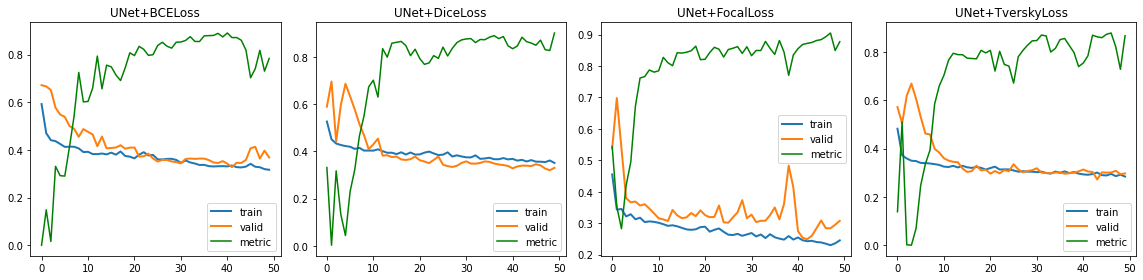

In [ ]:
unet_part_histories = [unet_bce_losses_history,
                         unet_dice_losses_history,
                         unet_focal_losses_history,
                         unet_tversky_losses_history]

plot_several_results(unet_part_histories, 'UNet', False, False)

Выводы:
1. У BCE скорее всего произошло переобучение, так как valid loss сначала вообще упал ниже train, а потом резко увеличиваться и метрика после этого начала падать
2. У Dice произошла странная картина, что valid ушел ниже train, но тем не менее их прямые сошлись и обе идут на понижение, метрика качества также растет
3. У Focal прямые сначала сошлись, потом разошлись, потом снова сошлись, но был сильный рост valid на ~37 эпохе, но так как метрика все же растет, значит, скорее всего, это не переобучение, а какой-то выброс. В целом результат по метрике выше, чем у других
4. У Tversky прямые сошлись и часто стали пересекаться друг с другом, причем значения метрики очень нестабильные и ниже чем у других, скорее всего это переобучение, и можно было бы закончить обучение на ~15 эпохе

Теперь о Lovasz:

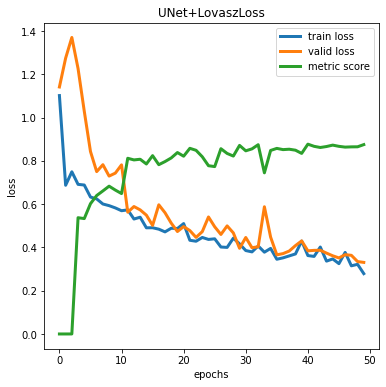

In [ ]:
plot_one_result(unet_lovasz_losses_history, 'UNet+LovaszLoss')

valid и train сошлись и обе идут на понижение, метрика стабильно растет, при чем без резких скачков. На мой взгляд, лучший график из всех графиков модели

Построим общий график:

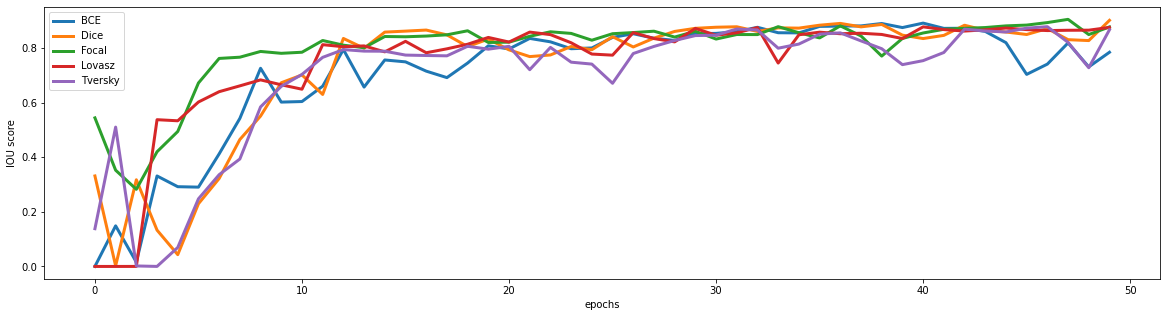

In [ ]:
unet_full_histories = [unet_bce_losses_history,
                         unet_dice_losses_history,
                         unet_focal_losses_history,
                         unet_lovasz_losses_history,
                         unet_tversky_losses_history]

plot_several_in_one(unet_full_histories, 'metric', 'IOU score')

Наиболее стабильными(меньше резких рывков в разные стороны) по метрике оказались Dice, Focal и Lovacz. У Tversky и BCE больше скачков вверх вниз, что не есть хорошо. Но, в целом, результаты лучше чем у SegNet`ов

### Сравнение лосс-функций для UNet2 

Сначала также сравним графики для BCE, Dice, Focal и Tversky, потом отдельно для Lovasz

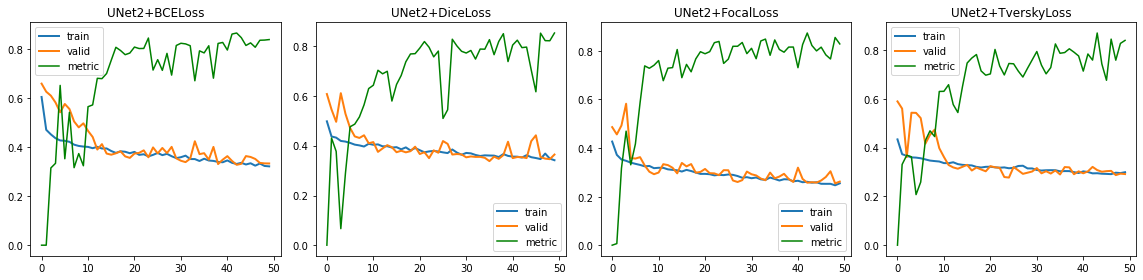

In [ ]:
unet2_part_histories = [unet2_bce_losses_history,
                         unet2_dice_losses_history,
                         unet2_focal_losses_history,
                         unet2_tversky_losses_history]

plot_several_results(unet2_part_histories, 'UNet2', False, False)

все как то странно обучаются потому что лосс и валид пересекаются очень сильно
Выводы:
1. По сути графики очень похожи: прямые valid и train сходяться и начинают часто пересекаться друг с другом, в то время, как metric сначала растет, а потом становится очень настабильна
2. Dice хуже всех проявил себя, так как на нем метрика наиболее настабильна
3. Focal показал лучший результат, т.к. метрика наиболее стабильна
4. Судя по графикам проблема, возможно, в самой модели, так как от разных лосс-функий картине особа не меняется

Теперь о Lovasz:

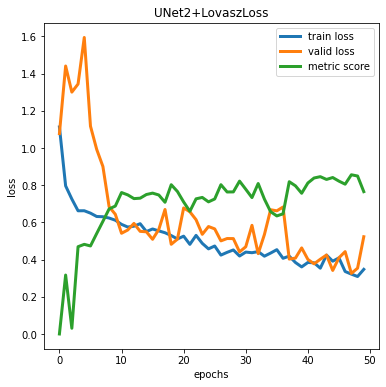

In [ ]:
plot_one_result(unet2_lovasz_losses_history, 'UNet2+LovaszLoss')

В целом, результат лучше остальных, чуть хуже Focal, т.к. есть какое-то резкое снижение метрики на ~36 эпохе, но тем не менее, метрика растет  

Построим общий график:

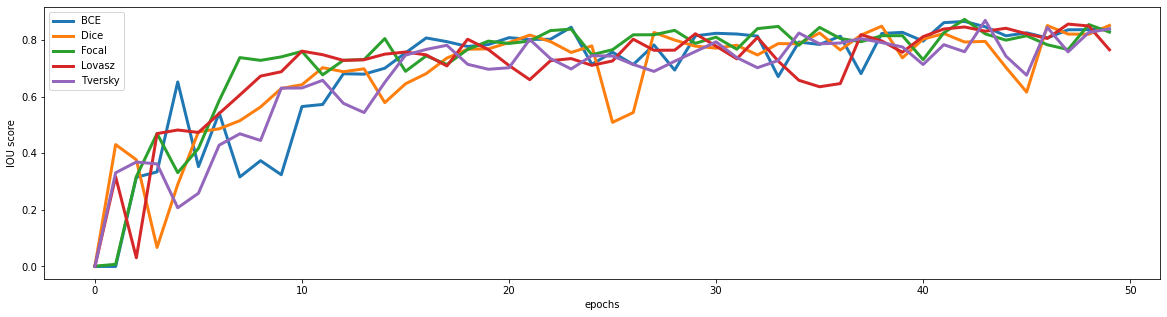

In [ ]:
unet2_full_histories = [unet2_bce_losses_history,
                         unet2_dice_losses_history,
                         unet2_focal_losses_history,
                         unet2_lovasz_losses_history,
                         unet2_tversky_losses_history]

plot_several_in_one(unet2_full_histories, 'metric', 'IOU score')

Выводы:
1. Общие результаты чуть лучше SegNet,  но хуже обычного Unet
2. Dice, который хорошо показал себя на двух предыдущих моделях - тут не такой стабильный(больше скачков вверх вниз)
3. Лучшие результаты по плавности кривых(нет скачков вверх вниз) Tversky и Focal and BCE.
4. BCE, который на других моделях показывал менее стабильные результаты, тут один из наиболее стабильных.

### Промежуточные выводы

Для начала построим таблицу:

| Model type | Best | Good | Worst |
| --- | --- | --- | --- |
| Segnet | Dice | BCE, Focal | Tversky |
| UNet | Focal | Lovasz | Dice |
| UNet2 | Focal | Dice, Locasz | Tversky |

Выводы:
1. Обычный UNet показывает на данной задаче лучшие результаты, лучше использовать его. 
2. Из моделей - хуже всех результаты показал SegNet
3. В качестве лосс-функции лучше использовать Focal, с ним обычно результаты лучше
4. Еще неплохо себя показывают в качестве лосс-функции Dice и Lovasz
5. В качестве лосс-функции лучше не использовать Tversky, с ним обычно результаты хуже

## Сравнение средних и макимальных  результатов по комбинациям моделей и лосс-функций

Для начала предлагаю сравнить результаты по средним значениям точности по метрике, это может быть полезно, потому что: \
&nbsp; &nbsp; &nbsp; Так как у нас все оценки качества по IOU лежат в диапазоне [0,1], и не может случиться ситуации когда одна оценка и другая, противоположная по модулю, в результате дают ноль. \
&nbsp; &nbsp; &nbsp; А это значит, что среднее значение точностей моделей будет показывать общую стабильность модели, т.к. если случиться ситуация, что модель нестабильна и ее точность то равна 0.5, то 0.8 - это все скажется на средней оценке, следовательно, если модель делает предсказание с точностью 0.9, то, скорее всего, модель со средней точностью 0.8 сделала это за счет правильного обучения и сможет повторить такой результат, а если модель со средней точносью 0.6 выдаст такой результат, то скорее всего ей просто повезло и повторить такой результат она не сможет

In [ ]:
losses_names = ['BCE', 'Dice', 'Focal', 'Lovasz', 'Tversky']
mean_iou_results = pd.DataFrame({'SegNet': convert_dict_list_to_double_list(segnet_full_histories, 'mean'),
                             'UNet': convert_dict_list_to_double_list(unet_full_histories, 'mean'),
                             'UNet2': convert_dict_list_to_double_list(unet2_full_histories, 'mean')}, index=losses_names)

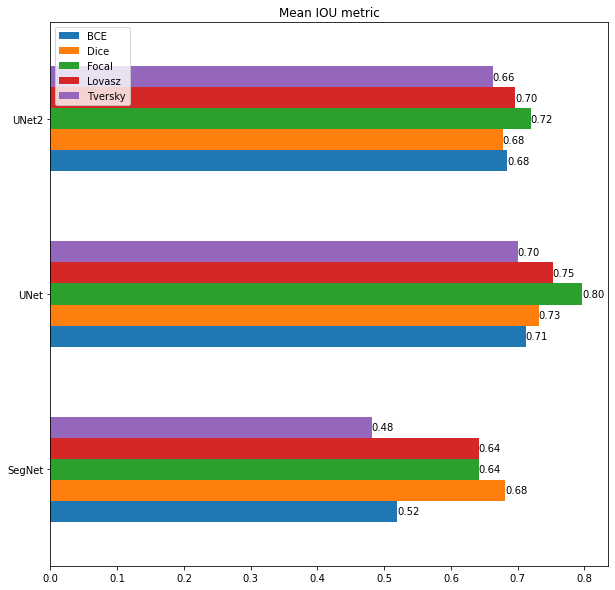

In [ ]:
fig, ax = plt.subplots()
mean_iou_results.T.plot(kind='barh', figsize=(10, 10), width=0.6, title='', ax=ax)
ax.set_title('Mean IOU metric')
ax.legend(loc='upper left')

# new helper method to auto-label bars
for i in range(len(losses_names)):

    ax.bar_label(ax.containers[i], fmt='%.2f')

**Выводы:**
1. Средняя точность обычно лучше у моделей использующий в качестве лосс-функций Dice, Focal или Lovasz
2. Лучшая средняя точность у UNet + FocalLoss

Теперь предлагаю сравнить максимальную точность по метрике каждой модели: очевидно, что чем выше был максимальный результат предсказаний, чем лучше

In [ ]:
max_iou_results = pd.DataFrame({'SegNet': convert_dict_list_to_double_list(segnet_full_histories, 'max'),
                             'UNet': convert_dict_list_to_double_list(unet_full_histories, 'max'),
                             'UNet2': convert_dict_list_to_double_list(unet2_full_histories, 'max')}, index=losses_names)

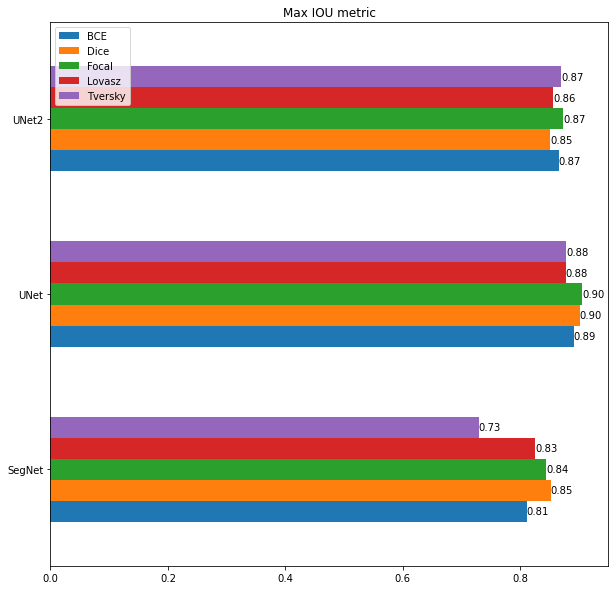

In [ ]:
fig, ax = plt.subplots()
max_iou_results.T.plot(kind='barh', figsize=(10, 10), width=0.6, title='', ax=ax)
ax.set_title('Max IOU metric')
ax.legend(loc='upper left')

for i in range(len(losses_names)):
    ax.bar_label(ax.containers[i], fmt='%.2f')

**Выводы:**
1. Максимальная точность обычно лучше у моделей использующий в качестве лосс-функций Focal или Dice
2. Лучшая средняя точность у UNet + FocalLoss, совсем немного от нее отстает UNet + DiceLoss

&nbsp; &nbsp; &nbsp; По сути во время обучения модели, мы хотим максимисировать как ее среднюю точность, так и максимальную, так как если мы объединим эти две метрики, то можем учесть сразу два фактора: стабильность точных предсказаний и лучший результат.\
&nbsp; &nbsp; &nbsp; Представим, идеальный случай, когда модель, уже после первой эпохи имеет точность 1.0 и поддерживает ее на всем цикле обучения, тогда и средняя и максимальная точности будут равны 1.0, т.е нужно максимизировать и среднюю и максимальную точность одновременно, т.е. максимизировать их произведение. \
&nbsp; &nbsp; &nbsp; Тогда можно ввести новую метрику: *Mean-Max Metric (MMM)*

$$MMM = mean \ metric \ value * max \ metric \ value$$

Она равна произведению средней и максимальной точностей и, чем ближе она к единице, тем лучше качество модели(так как и средняя и максимальная точности лежат в диапазоне [0, 1], а, значит, максимальный результат их произведения равен 1.0). Теперь посчитаем эту метрику для наших результатов:

In [ ]:
mmm_iou_results = pd.DataFrame({'SegNet': convert_dict_list_to_double_list(segnet_full_histories, 'mmm'),
                             'UNet': convert_dict_list_to_double_list(unet_full_histories, 'mmm'),
                             'UNet2': convert_dict_list_to_double_list(unet2_full_histories, 'mmm')}, index=losses_names)

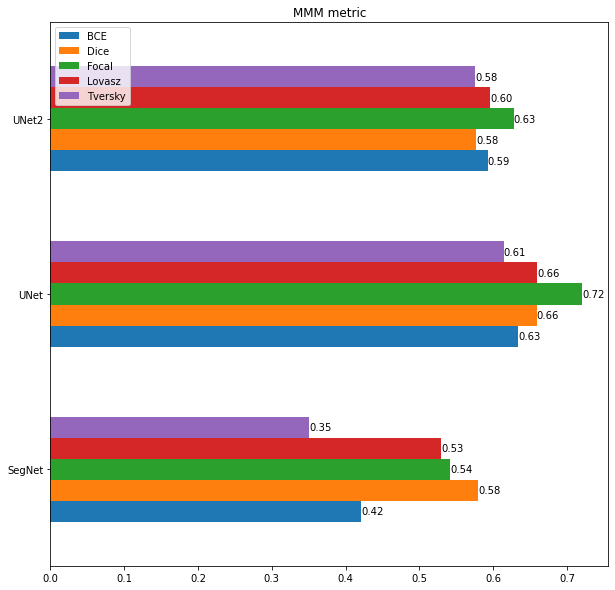

In [ ]:
fig, ax = plt.subplots()
mmm_iou_results.T.plot(kind='barh', figsize=(10, 10), width=0.6, title='', ax=ax)
ax.set_title('MMM metric')
ax.legend(loc='upper left')

for i in range(len(losses_names)):
    ax.bar_label(ax.containers[i], fmt='%.2f')

**Выводы:**
1. По результатам этой метрики лучшая модель опять UNet+Focal(UNet+Dice, которая давала почти такой же максимальный результат по этой метрике сильно проигрывает)
2. По этой метрики для UNet моделей(обоих версий) - лучшие лоссы: Focal, Dice, Lovacz; для SegNet - Focal и Lovacz
3. Tversky во всех трех моделях показывает наихудший результат

***&nbsp; &nbsp; &nbsp; Таким образом, учитывая все предыдущие выводы, можно сказать, что лучше всего в данной задаче проявили себя UNet+FocalLoss.***\
Попробуем еще улучшить точность этой модели, уменьшив learning rate и увеличив число эпох.

In [ ]:
## лучший скор на метрике показал UNet с focal loss - попробуем выжать из него максимум
del unet2_tversky_model, optimizer, scheduler
torch.cuda.empty_cache()
gc.collect()

21674

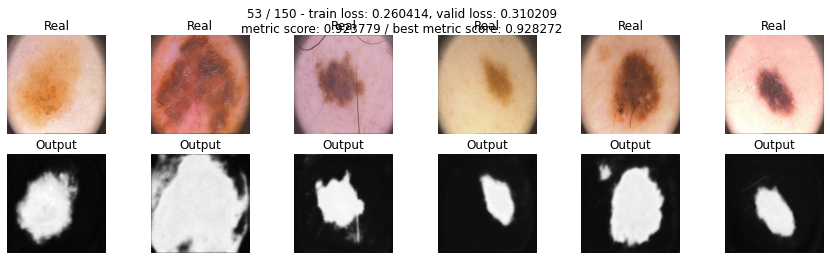

* Epoch 54/150


In [ ]:
# если уже модель существует, удалим ее, чтобы освободить память
if 'best_model' in globals():
    del best_model, optimizer, scheduler
    torch.cuda.empty_cache()
    gc.collect()
    
best_model = UNet()
best_model = best_model.to(device)
optimizer = torch.optim.AdamW(best_model.parameters(), lr=3e-4, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 50, 75, 100, 125], gamma=0.75)
max_epochs = 150

best_model, best_model_name, best_model_losses_history = train(best_model, optimizer, scheduler, 
                                                                                 focal_loss, score_model, max_epochs, 
                                                                                 data_tr, data_val, model_name='best_model')

/*Сверху картинка почему-то не та, итоговый вывод выглядит вот так:*/
![best-model.png](attachment:best-model.png)

In [ ]:
save_file(best_model_losses_history, 'best_model_losses_history')
best_model_losses_history_loaded_from = load_file('best_model_losses_history')
best_model_losses_history == best_model_losses_history_loaded_from

In [ ]:
del best_model_losses_history_loaded_from
best_model_losses_history = convert_data(load_file('best_model_losses_history'))

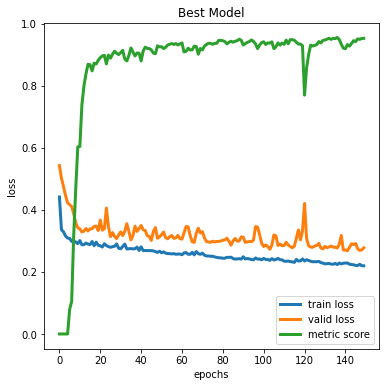

In [ ]:
plot_one_result(best_model_losses_history, 'Best Model')

***Максимальный полученный скор: 0.955201***

P.S. все истории данных, итоговые выводы изображений цикла обучения, а также часть обученных моделей(все не успел скачать, Гугл оборвал сеанс) можно найти [тут](https://drive.google.com/drive/folders/1e9ieFdCKYQ06Q_URHyyn2A5AG-mWcrgo?usp=sharing)